# Tourists at Home

### Executive Summary

This project aims to understand the local perception of Domestic Tourism and to provide further insights for STB to plan its next phase of the #SingapoRediscovers campaign. By targetting Singaporeans more effectively, we aim to build up a sustainable economy of domestic tourism based on renewed and sustained interest in their own home country, which should serve our tourism industry well both during and after Covid-19.

This notebook imports the DataFrames we have processed and cleaned from our Preprocessing notebook 2.0 for exploratory data analysis (EDA). Between manipulating the data and analysing it, we also perform features engineering as well as imputation for missing data in this notebook. Notable features engineered here include meta-features such as parsing the datetime column correctly and generating topic tags. For imputation, the strategy is always to deduce where possible and infer otherwise, before considering to drop incomplete data points if they make up only a small subset of our dataset.

#### Content

- [Import DataFrames](#Import-DataFrames)
- [All about Likes](#All-about-Likes)
- [Merging Considerations](#Merging-Considerations)
- [Merge DataFrames for Baseline Model](#Merge-DataFrames-for-Baseline-Model)
- [Popularity Contest](#Popularity-Contest)
- [Features Engineering](#Features-Engineering)
- [Re-merge DataFrames](#Re-merge-DataFrames)
- [Features Analysis](#Features-Analysis)

#### Python Libraries

In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

%matplotlib inline

### Import DataFrames

In [2]:
df_insta_sel = pd.read_csv("../datasets/df_insta_sel.csv", parse_dates=["date_time"])
df_insta_sel.shape

(14256, 25)

In [3]:
df_insta_sel.head(3)

,post_id,post_slug,unix_time,date_time,post_caption,hashtags,topic_tags,is_video,is_ad,post_likes,...,owner_unpublished,owner_total_posts,owner_total_followers,post_caption_clean,post_caption_drop_target,post_caption_drop_hash,at_tags,useful_tags,tags,content
0,1006641971264095607,34T4oZMgV3,1434221095,2015-06-13 18:44:55,Oh look! Natural heart shaped form of Ivan Hen...,"['#pinkdotsg', '#whereloveslivesg', '#rediscov...",['2 people.'],False,False,40,...,False,5205,1232,oh look natural heart shaped form ivan heng gl...,oh look natural heart shaped form ivan heng gl...,oh look natural heart shaped form ivan heng gl...,NaN,NaN,NaN,oh look natural heart shaped form ivan heng gl...
1,1202880298563729182,BCxfUInNPce,1457614527,2016-03-10 12:55:27,.\n.\n.\n.\n.\n.\n#exploresingapore #instasg #...,"['#exploresingapore', '#instasg', '#gf_singapo...",['indoor.'],False,False,33,...,False,742,995,#exploresingapore #instasg #gfsingapore #gameo...,#exploresingapore #instasg #gfsingapore #gameo...,NaN,NaN,indoor,indoor,#exploresingapore #instasg #gfsingapore #gameo...
2,677102977071319026,lljZH4sgfy,1394936986,2014-03-16 02:29:46,On the road to hell..... Reliving Haw Par Vill...,"['', '#singapore']",['Photo by Belinda Tan in 虎豹别墅.'],False,False,3,...,False,5205,1232,road hell reliving haw par villa 15 16 22 23 m...,road hell reliving haw par villa 15 16 22 23 m...,road hell reliving haw par villa 15 16 22 23 m...,NaN,NaN,NaN,road hell reliving haw par villa 15 16 22 23 m...


In [4]:
df_yt_sel = pd.read_csv("../datasets/df_yt_sel.csv", parse_dates=["date_time"])
df_yt_sel.shape

(248, 12)

In [5]:
df_yt_sel.head(3)

,video_title,video_caption,date_time,video_slug,video_views,video_likes,video_dislikes,video_comments,video_title_clean,video_caption_clean,content,channel
0,HALLOWEEN HORROR NIGHTS 8 AT UNIVERSAL STUDIOS! 👻,['UNIVERSAL HALLOWEEN HORROR NIGHTS 8! 👻\n\nHa...,2018-10-31,7xkdm3c4Ks8,8766,271,3,18,halloween horror nights 8 universal studios,'universal halloween horror nights 8 happy hal...,halloween horror nights 8 universal studios 'u...,GC
1,Eating the BEST rated PRATA in SINGAPORE! 🇸🇬 *...,['Eating the BEST rated PRATA in SINGAPORE! 🇸🇬...,2019-11-17,b-ppBtSiG38,33483,649,19,159,eating best rated prata longest queue ever,'eating best rated prata eaten prata think che...,eating best rated prata longest queue ever 'ea...,GC
2,McDoanlds Hokkaido Salmon Burger In Singapore!,['TRYING MCDONALDS HOKKAIDO SALMON BURGER IN S...,2018-05-13,IDXoNb548ec,13809,430,13,117,mcdoanlds hokkaido salmon burger,'trying mcdonalds hokkaido salmon burger try i...,mcdoanlds hokkaido salmon burger 'trying mcdon...,GC


In [6]:
df_yt_comments_sel = pd.read_csv("../datasets/df_yt_comments_sel.csv")
df_yt_comments_sel.shape

(10590, 8)

In [7]:
df_yt_comments_sel.head(3)

,response_to,user,timestamp,comment,likes,replies_attracted,comment_clean,channel
0,HALLOWEEN HORROR NIGHTS 8 AT UNIVERSAL STUDIOS! 👻,thattham,1 year ago,"I was a scare actor in killuminati, we hope u ...",4,CLAIM NOW!,scare actor killuminati hope u liked,GC
1,McDoanlds Hokkaido Salmon Burger In Singapore!,Whyywinter.,2 years ago,Hey friends! 👋🏻 What’s your thoughts on Mcdona...,35,View 10 replies,hey friends what’s thoughts mcdonalds hakkaido...,GC
2,McDoanlds Hokkaido Salmon Burger In Singapore!,CT,2 years ago,Is it even possible to dislike seaweed shaker ...,51,NaN,even possible dislike seaweed shaker fries tot...,GC


### All about Likes

Since we are using likes as our target variable towards understanding popularity, it is important to understand the distribution of our target variable as well as if there are any correlation between our target variable and other features. Understanding the distribution of likes is also helpful for us when we eventually have to consider the sort of data shaping we may need when we have to compare and evaluate the number of likes across platforms.

#### Instagram Likes

In [8]:
df_insta_sel.head(1)

,post_id,post_slug,unix_time,date_time,post_caption,hashtags,topic_tags,is_video,is_ad,post_likes,...,owner_unpublished,owner_total_posts,owner_total_followers,post_caption_clean,post_caption_drop_target,post_caption_drop_hash,at_tags,useful_tags,tags,content
0,1006641971264095607,34T4oZMgV3,1434221095,2015-06-13 18:44:55,Oh look! Natural heart shaped form of Ivan Hen...,"['#pinkdotsg', '#whereloveslivesg', '#rediscov...",['2 people.'],False,False,40,...,False,5205,1232,oh look natural heart shaped form ivan heng gl...,oh look natural heart shaped form ivan heng gl...,oh look natural heart shaped form ivan heng gl...,NaN,NaN,NaN,oh look natural heart shaped form ivan heng gl...


In [9]:
df_insta_sel.columns

Index(['post_id', 'post_slug', 'unix_time', 'date_time', 'post_caption',
       'hashtags', 'topic_tags', 'is_video', 'is_ad', 'post_likes', 'geo_tag',
       'geo_slug', 'owner_id', 'owner_verified', 'owner_privacy',
       'owner_unpublished', 'owner_total_posts', 'owner_total_followers',
       'post_caption_clean', 'post_caption_drop_target',
       'post_caption_drop_hash', 'at_tags', 'useful_tags', 'tags', 'content'],
      dtype='object')

In [10]:
df_insta_sel["post_likes"].describe()

count    14256.000000
mean       113.632225
std        289.869303
min          0.000000
25%         18.000000
50%         40.000000
75%         92.000000
max       8247.000000
Name: post_likes, dtype: float64

Let us engineer new features to evaluate our likes against:
- Age of posts that indicate that time period between time of scrape and when the content was published
- Number of hashtags used
- Total length of text of post title and captions

In [11]:
# posts were scraped over 5 days
# let's take the last date of scrape on 2020-10-22
scrape = pd.Timestamp("2020-10-22 23:59")

# create new col for age of post
df_insta_sel["post_age"] = scrape - df_insta_sel["date_time"]
df_insta_sel["post_age"] = df_insta_sel["post_age"].dt.days # round down age of post to days
df_insta_sel.shape # verify new col added

(14256, 26)

In [12]:
# count no. of hashtags used in the post
df_insta_sel["hash_count"] = [len(re.findall(r"#", str(h))) for h in df_insta_sel["hashtags"]]
df_insta_sel.shape # verify new col added

(14256, 27)

In [13]:
# count total text length of post
df_insta_sel["content_len"] = df_insta_sel["content"].str.len()
df_insta_sel.shape # verify new col added

(14256, 28)

In [14]:
df_insta_sel.head(3)

,post_id,post_slug,unix_time,date_time,post_caption,hashtags,topic_tags,is_video,is_ad,post_likes,...,post_caption_clean,post_caption_drop_target,post_caption_drop_hash,at_tags,useful_tags,tags,content,post_age,hash_count,content_len
0,1006641971264095607,34T4oZMgV3,1434221095,2015-06-13 18:44:55,Oh look! Natural heart shaped form of Ivan Hen...,"['#pinkdotsg', '#whereloveslivesg', '#rediscov...",['2 people.'],False,False,40,...,oh look natural heart shaped form ivan heng gl...,oh look natural heart shaped form ivan heng gl...,oh look natural heart shaped form ivan heng gl...,NaN,NaN,NaN,oh look natural heart shaped form ivan heng gl...,1958,18,326.0
1,1202880298563729182,BCxfUInNPce,1457614527,2016-03-10 12:55:27,.\n.\n.\n.\n.\n.\n#exploresingapore #instasg #...,"['#exploresingapore', '#instasg', '#gf_singapo...",['indoor.'],False,False,33,...,#exploresingapore #instasg #gfsingapore #gameo...,#exploresingapore #instasg #gfsingapore #gameo...,NaN,NaN,indoor,indoor,#exploresingapore #instasg #gfsingapore #gameo...,1687,21,274.0
2,677102977071319026,lljZH4sgfy,1394936986,2014-03-16 02:29:46,On the road to hell..... Reliving Haw Par Vill...,"['', '#singapore']",['Photo by Belinda Tan in 虎豹别墅.'],False,False,3,...,road hell reliving haw par villa 15 16 22 23 m...,road hell reliving haw par villa 15 16 22 23 m...,road hell reliving haw par villa 15 16 22 23 m...,NaN,NaN,NaN,road hell reliving haw par villa 15 16 22 23 m...,2412,1,95.0


In [15]:
df_insta_sel.columns

Index(['post_id', 'post_slug', 'unix_time', 'date_time', 'post_caption',
       'hashtags', 'topic_tags', 'is_video', 'is_ad', 'post_likes', 'geo_tag',
       'geo_slug', 'owner_id', 'owner_verified', 'owner_privacy',
       'owner_unpublished', 'owner_total_posts', 'owner_total_followers',
       'post_caption_clean', 'post_caption_drop_target',
       'post_caption_drop_hash', 'at_tags', 'useful_tags', 'tags', 'content',
       'post_age', 'hash_count', 'content_len'],
      dtype='object')

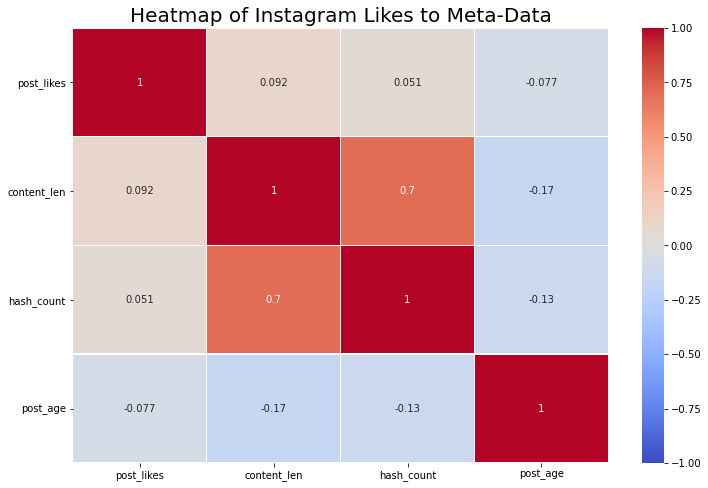

In [16]:
plt.figure(figsize=[12,8])
plt.title("Heatmap of Instagram Likes to Meta-Data", size=20)
sns.heatmap(df_insta_sel[["post_likes", "content_len", "hash_count", "post_age"]].corr(), annot=True, cmap="coolwarm",
            vmin=-1, vmax=1, linewidths=0.5)
plt.yticks(rotation=0)
plt.savefig("../assets/insta_heatmap.png", transparent=True, bbox_inches='tight')
plt.show()

Unsurprisingly, text length is pretty strongly correlated with the number of hashtags used. However, it seems that none of the selected meta-data are individually strongly correlated with the number of likes on a post.

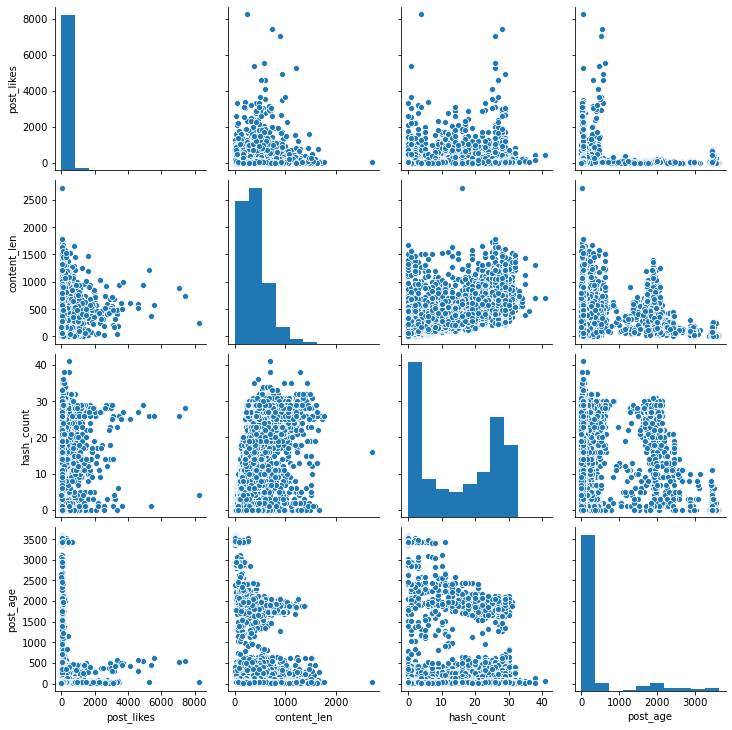

In [17]:
sns.pairplot(df_insta_sel[["post_likes", "content_len", "hash_count", "post_age"]])
plt.savefig("../assets/insta_pairplot.png", transparent=True, bbox_inches='tight')
plt.show()

In [18]:
# from the pairplots above
### there are no clear strong trends between the features and the no. of insta likes
### w.r.t. the length of text, it appears that past a certain point, there are diminishing returns
### w.r.t. the no. of hashtags, there also appears to be diminishing returns past a certain point
##### but there also seem to be two (low and med) ranges in which no. of likes go up (or they may be viral anomalies)
### w.r.t. the age of the post, the no. of likes generally increases over time
##### but for many that are only shared among a small circle, they plateau fairly quickly

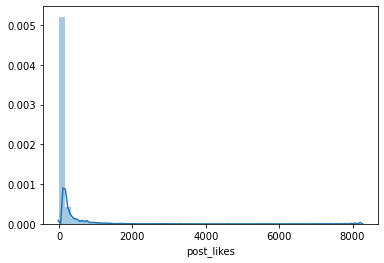

In [19]:
sns.distplot(df_insta_sel["post_likes"]);
# it seems most posts gather only a few likes
# viral posts are the exception

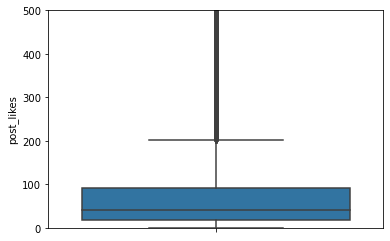

In [20]:
# boxplot of posts with < 501 likes
plt.ylim([0, 500])
sns.boxplot(df_insta_sel["post_likes"], orient="v");

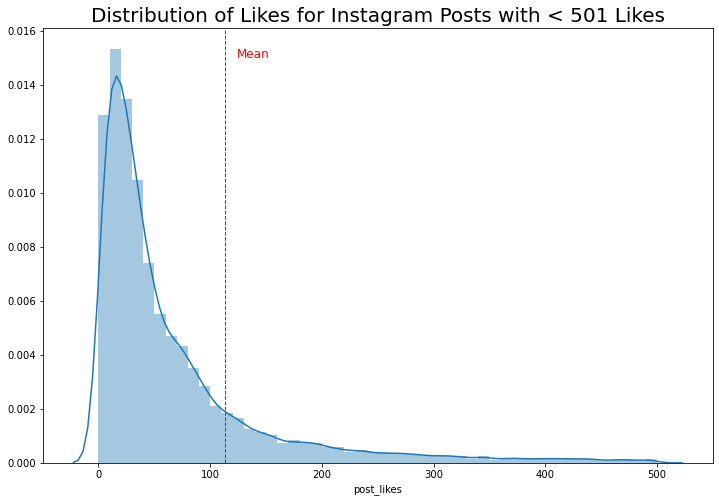

In [21]:
# let's plot dist for posts with < 501 likes
plt.figure(figsize=[12,8])
plt.title("Distribution of Likes for Instagram Posts with < 501 Likes", size=20)
sns.distplot(df_insta_sel[df_insta_sel["post_likes"] <= 500]["post_likes"])
plt.axvline(x=df_insta_sel["post_likes"].mean(), color="r", ls="--", lw=1, label="Mean")
plt.text(x=df_insta_sel["post_likes"].mean()+10, y=0.015, s="Mean", color="r", size=12)
plt.savefig("../assets/insta_likes_dist.png", transparent=True, bbox_inches='tight')
plt.show()

We can observe a skewed distribution for Instagram likes.

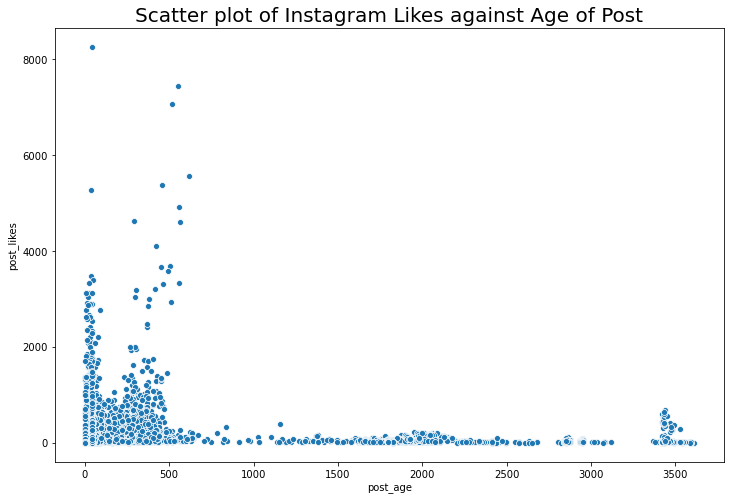

In [22]:
plt.figure(figsize=[12,8])
plt.title("Scatter plot of Instagram Likes against Age of Post", size=20)
sns.scatterplot(x=df_insta_sel["post_age"], y=df_insta_sel["post_likes"])
plt.savefig("../assets/insta_likes_age.png", transparent=True, bbox_inches='tight')
plt.show()

We would expect Instagram likes to be very current and unaffected by time, but it appears that posts that are more current tend to receive more likes. This could be a bias from our dataset since our Instagram scrapes were targetted by querying trending and relevant hashtags. This means that content that are posted more recently and using these hastags will receive more visibility which will also translate to more likes. Not to mention the user growth in Instagram is bound to have an exponential effect on the average number of likes a post would gain today versus 3500 days ago.

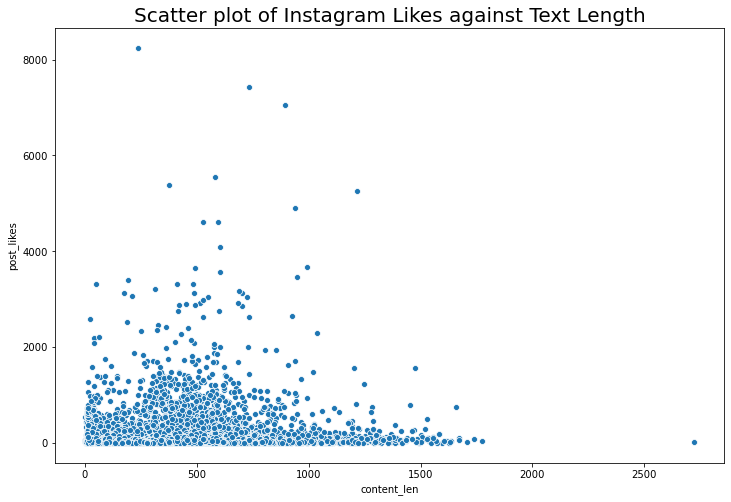

In [23]:
plt.figure(figsize=[12,8])
plt.title("Scatter plot of Instagram Likes against Text Length", size=20)
sns.scatterplot(x=df_insta_sel["content_len"], y=df_insta_sel["post_likes"])
plt.savefig("../assets/insta_likes_len.png", transparent=True, bbox_inches='tight')
plt.show()

There appears to be a slight downtrend between length of text content and the number of likes. It appears to not matter as much when the length is less than 1000 characters, but experience diminishing returns beyond that point.

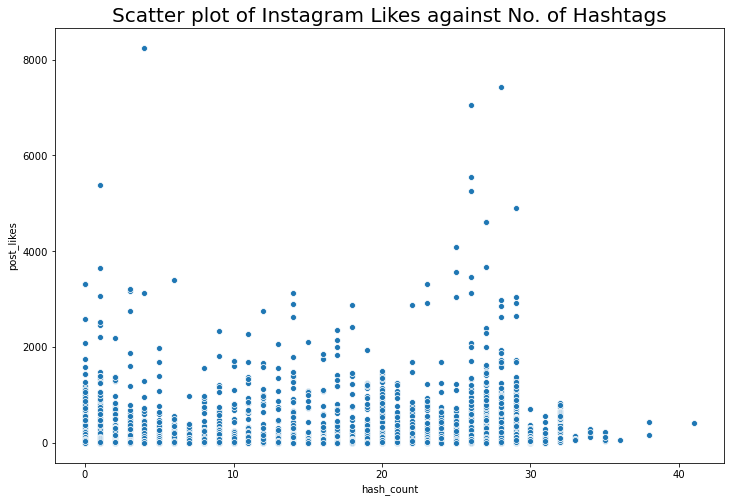

In [24]:
plt.figure(figsize=[12,8])
plt.title("Scatter plot of Instagram Likes against No. of Hashtags", size=20)
sns.scatterplot(x=df_insta_sel["hash_count"], y=df_insta_sel["post_likes"])
plt.savefig("../assets/insta_likes_hash.png", transparent=True, bbox_inches='tight')
plt.show()

In [25]:
df_insta_sel["hash_count"].describe()

count    14256.000000
mean        15.130962
std         11.585748
min          0.000000
25%          2.000000
50%         17.000000
75%         27.000000
max         41.000000
Name: hash_count, dtype: float64

Similarly for number of hashtags used, there is diminishing returns once a post uses more than 30 hashtags.

#### YouTube Video Likes

In [26]:
df_yt_sel.head(1)

,video_title,video_caption,date_time,video_slug,video_views,video_likes,video_dislikes,video_comments,video_title_clean,video_caption_clean,content,channel
0,HALLOWEEN HORROR NIGHTS 8 AT UNIVERSAL STUDIOS! 👻,['UNIVERSAL HALLOWEEN HORROR NIGHTS 8! 👻\n\nHa...,2018-10-31,7xkdm3c4Ks8,8766,271,3,18,halloween horror nights 8 universal studios,'universal halloween horror nights 8 happy hal...,halloween horror nights 8 universal studios 'u...,GC


In [27]:
df_yt_sel["video_likes"].describe()

count      248.000000
mean      1408.713710
std       1441.581153
min          0.000000
25%        553.750000
50%       1053.000000
75%       1718.500000
max      13913.000000
Name: video_likes, dtype: float64

In [28]:
# let's create new features to evaluate likes against
### age of posts - from time of scrape to date of post
### length of text in video title and captions

In [29]:
# posts were scraped over 2 days
# let's take the last date of scrape on 2020-10-18
scrape = pd.Timestamp("2020-10-18 23:59")

# create new col for age of video
df_yt_sel["video_age"] = scrape - df_yt_sel["date_time"]
df_yt_sel["video_age"] = df_yt_sel["video_age"].dt.days # round down age of video to days
df_yt_sel.shape # verify new col added

(248, 13)

In [30]:
# count total text length of video titles and captions
df_yt_sel["content_len"] = df_yt_sel["content"].str.len()
df_yt_sel.shape # verify new col added

(248, 14)

In [31]:
df_yt_sel.columns

Index(['video_title', 'video_caption', 'date_time', 'video_slug',
       'video_views', 'video_likes', 'video_dislikes', 'video_comments',
       'video_title_clean', 'video_caption_clean', 'content', 'channel',
       'video_age', 'content_len'],
      dtype='object')

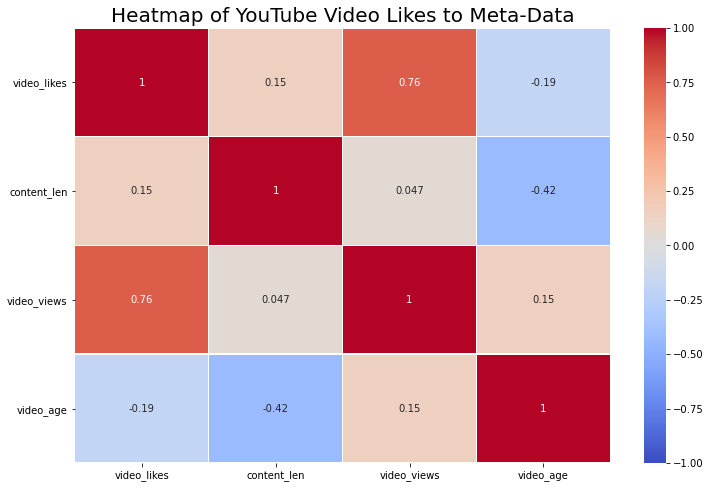

In [32]:
plt.figure(figsize=[12,8])
plt.title("Heatmap of YouTube Video Likes to Meta-Data", size=20)
sns.heatmap(df_yt_sel[["video_likes", "content_len", "video_views", "video_age"]].corr(), annot=True, cmap="coolwarm",
            vmin=-1, vmax=1, linewidths=0.5)
plt.yticks(rotation=0)
plt.savefig("../assets/ytvid_heatmap.png", transparent=True, bbox_inches='tight')
plt.show()

Unsurprisingly, the number of views is strongly correlated with the number of likes. However, it seems that none of the other selected meta-data are strongly correlated with the number of likes on a video.

In [33]:
df_yt_sel["channel"].isnull().sum()

0

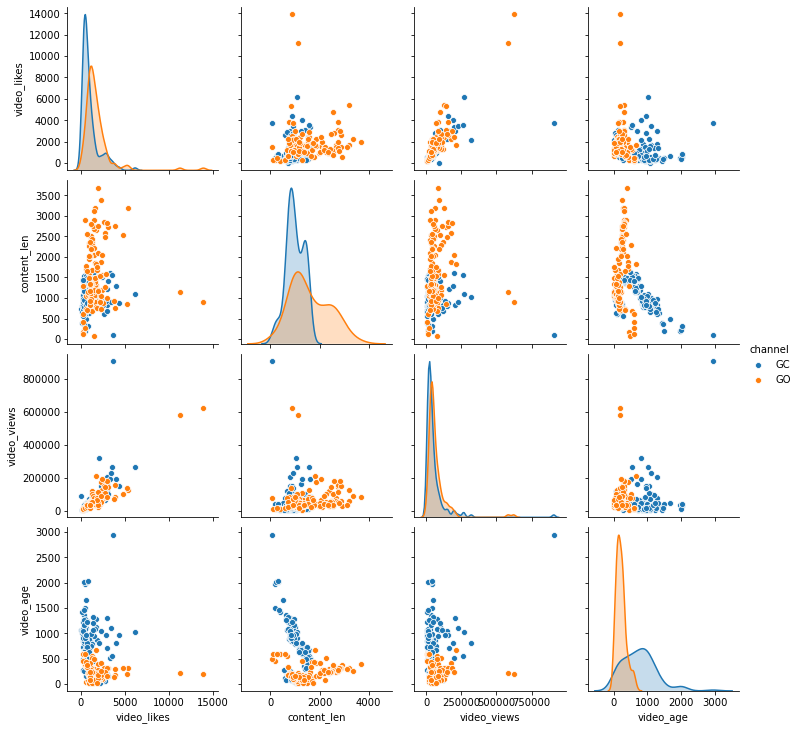

In [34]:
sns.pairplot(data=df_yt_sel, x_vars=["video_likes", "content_len", "video_views", "video_age"],
             y_vars=["video_likes", "content_len", "video_views", "video_age"], hue="channel")
plt.savefig("../assets/ytvid_pairplot.png", transparent=True, bbox_inches='tight')
plt.show()

From the pairplots above, we can observe the distribution of the data as well as any possible correlation between data points.

In terms of likes received, GO's videos received greater love than GC's with a wider peak than GC's taller but narrower peak. From this we can see that GC's videos are more consistent in its likes performance while there are more exceptional GO's videos that outperform his average video. Interestingly, this is despite both GC and GO having pretty similar viewership, with GC just edging past GO. We would expect increased viewership would bring in an increase in likes, but this does not appear to be the case, suggesting a difference in the types of viewers (behaviour) each channel's videos attract. GO's video captions also tend to be wordier than GC's, but this could be in part because of the Japanese translation/text that GO may include in the title/captions. Finally, the age of GO's videos are generally younger than GC, with GC having done this for a longer time while GO is more prolific in pushing out videos in the recent space in time.

Where it comes to comparing scatter plot patterns, there are no clear strong trends between selected features and the number of likes received except for the expected correlation between video views and likes. Number of likes received by a video is strongly correlated with its viewership. It is interesting to note that the likes-conversion for every one viewer attracted appears to differ across channels, with GO having a greater conversion rate than GC. With respect to the length of text in video description (title and captions), it appears to be neutrally correlated to the number of likes apart from a few outliers. Finally, number of likes appear to be generally neutrally correlated with the age of the post. The number of likes a video will attract will quickly reach its peak and plateau.

In [35]:
df_yt_sel.groupby("channel").get_group("GC")["video_likes"].mean()

1063.2388059701493

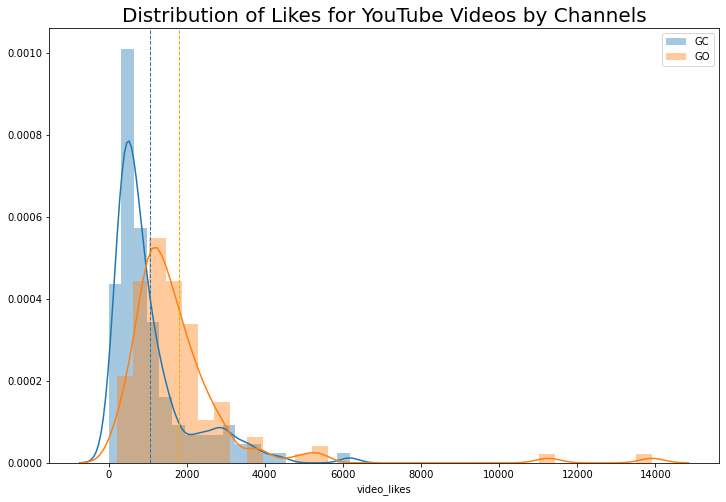

In [36]:
# let's take a closer look at the distribution of likes across channels
plt.figure(figsize=[12,8])
plt.title("Distribution of Likes for YouTube Videos by Channels", size=20)

sns.distplot(df_yt_sel.groupby("channel").get_group("GC")["video_likes"], label="GC")
plt.axvline(x=df_yt_sel.groupby("channel").get_group("GC")["video_likes"].mean(), ls="--", lw=1)

sns.distplot(df_yt_sel.groupby("channel").get_group("GO")["video_likes"], label="GO")
plt.axvline(x=df_yt_sel.groupby("channel").get_group("GO")["video_likes"].mean(), color="orange", ls="--", lw=1)

plt.legend()
plt.savefig("../assets/ytvid_likes_dist.png", transparent=True, bbox_inches='tight')
plt.show()

We can observe that the likes distribution for both channels are skewed, but of different mean and variance.

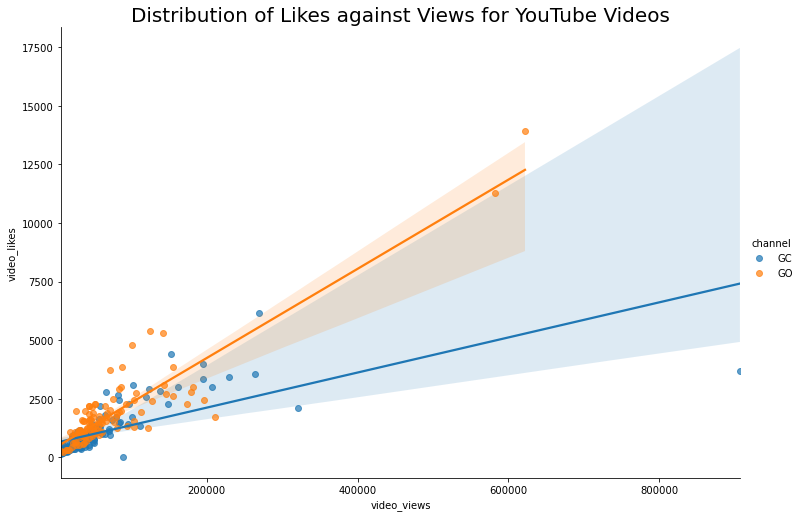

In [37]:
# let's take a closer look at the distribution of likes against viewership
sns.lmplot(x="video_views", y="video_likes", data=df_yt_sel, hue="channel",
           height=7, aspect=1.5, scatter_kws={"alpha": 0.7})
plt.title("Distribution of Likes against Views for YouTube Videos", size=20)
plt.savefig("../assets/ytvid_likes_views.png", transparent=True, bbox_inches='tight')
plt.show()

There is a strong upwards trend between the number of views and the number of likes a video receives. This is to be expected since we can consider the number of likes as a variable dependent on the number of views it must first attract. As such, we should leave this feature out of our training set lest we contaminate it with information about the target variable.

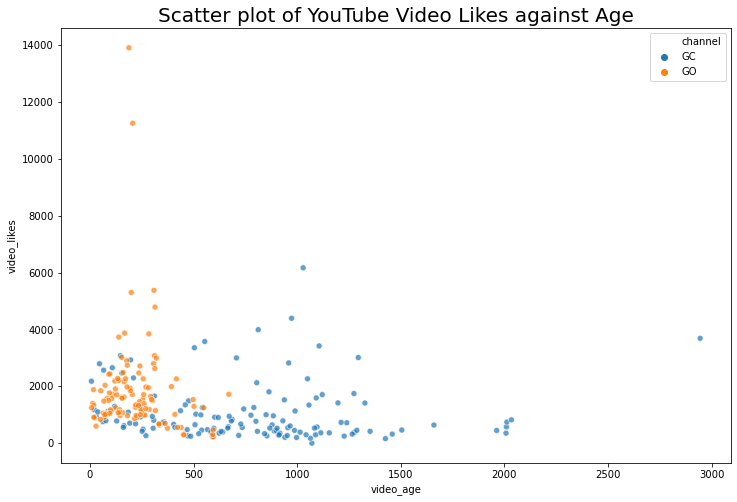

In [38]:
plt.figure(figsize=[12,8])
plt.title("Scatter plot of YouTube Video Likes against Age", size=20)
sns.scatterplot(data=df_yt_sel, x="video_age", y="video_likes", hue="channel", alpha=0.7)
plt.savefig("../assets/ytvid_likes_len.png", transparent=True, bbox_inches='tight')
plt.show()

Plotting age of videos against the number of likes revealed that both channels appear to be performing better over time, which is to be expected as their channel gains traction and subscribers. We can observe that Ghib Ojisan's channel appears to grow at a much faster pace than Georgia Caney's.

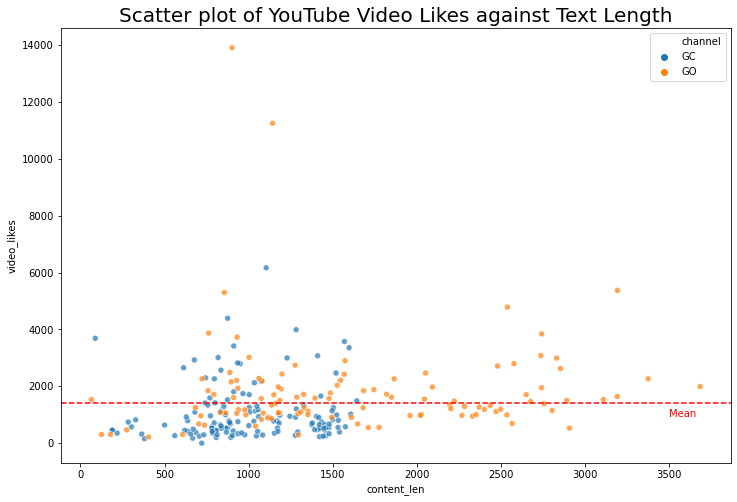

In [39]:
plt.figure(figsize=[12,8])
plt.title("Scatter plot of YouTube Video Likes against Text Length", size=20)
sns.scatterplot(data=df_yt_sel, x="content_len", y="video_likes", hue="channel", alpha=0.7)
plt.axhline(y=df_yt_sel["video_likes"].mean(), color='r', linestyle='--')
plt.text(3500, df_yt_sel["video_likes"].mean()-500, "Mean", color="r", size=10)
plt.savefig("../assets/ytvid_likes_len.png", transparent=True, bbox_inches='tight')
plt.show()

In [40]:
df_yt_sel["content_len"].describe()

count     248.000000
mean     1287.564516
std       670.364143
min        65.000000
25%       837.500000
50%      1139.500000
75%      1520.000000
max      3684.000000
Name: content_len, dtype: float64

When it comes to the length of the text content, there is no clear pattern than can be observed. Perhaps, there is a minimum length of description required for a video to be popular. It seems that videos with title and description of less than 500 characters perform worse on average than its the rest of the plots.

#### YouTube Comment Likes

In [41]:
df_yt_comments_sel.head(1)

,response_to,user,timestamp,comment,likes,replies_attracted,comment_clean,channel
0,HALLOWEEN HORROR NIGHTS 8 AT UNIVERSAL STUDIOS! 👻,thattham,1 year ago,"I was a scare actor in killuminati, we hope u ...",4,CLAIM NOW!,scare actor killuminati hope u liked,GC


In [42]:
df_yt_comments_sel["likes"].describe()

count    10590.000000
mean        19.679603
std         90.542812
min          0.000000
25%          0.000000
50%          3.000000
75%         12.000000
max       4400.000000
Name: likes, dtype: float64

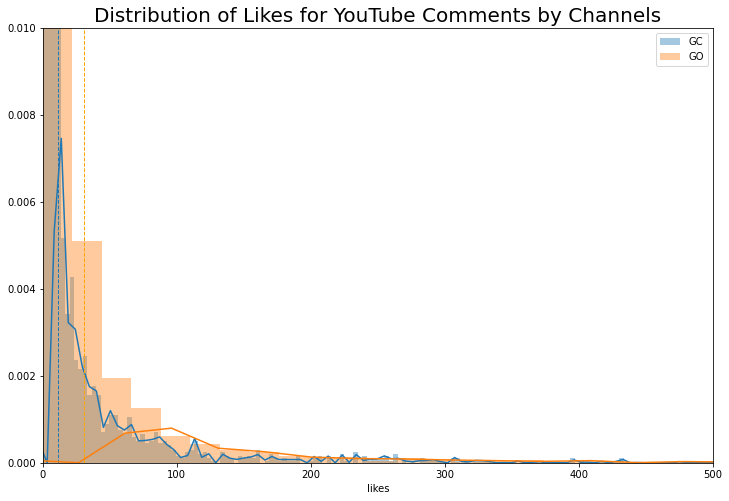

In [178]:
# let's take a closer look at the distribution of likes across channels
plt.figure(figsize=[12,8])
plt.title("Distribution of Likes for YouTube Comments by Channels", size=20)

gc = sns.distplot(df_yt_comments_sel.groupby("channel").get_group("GC")["likes"], label="GC", bins=200)
plt.axvline(x=df_yt_comments_sel.groupby("channel").get_group("GC")["likes"].mean(), ls="--", lw=1)

go = sns.distplot(df_yt_comments_sel.groupby("channel").get_group("GO")["likes"], label="GO", bins=200)
plt.axvline(x=df_yt_comments_sel.groupby("channel").get_group("GO")["likes"].mean(), color="orange", ls="--", lw=1)

gc.set(ylim=(0, 0.01))
gc.set(xlim=(0, 500))
go.set(ylim=(0, 0.01))
go.set(xlim=(0, 500))

plt.legend()
plt.savefig("../assets/ytcomm_likes_dist.png", transparent=True, bbox_inches='tight')
plt.show()

Scraped timestamp for YouTube comments are not accurate and only give a vague timeline, especially so for comments dated more than a year ago. Since there is no other alternative, let su assume that comments were made on the same day as the video it is responding to, which I believe would be accurate to within 7 days for most comments.

In [43]:
# assume that comments were made on the same day as the video it is responding to
df_video_dates = df_yt_sel[["video_title", "date_time"]] # take datetime from this df
df_video_dates.rename({"video_title": "response_to"}, axis=1, inplace=True)
df_video_dates.head(3)

C:\Users\yewto\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,response_to,date_time
0,HALLOWEEN HORROR NIGHTS 8 AT UNIVERSAL STUDIOS! 👻,2018-10-31
1,Eating the BEST rated PRATA in SINGAPORE! 🇸🇬 *...,2019-11-17
2,McDoanlds Hokkaido Salmon Burger In Singapore!,2018-05-13


In [44]:
# merge in datetime col based on video titles
df_yt_comments_sel = df_yt_comments_sel.merge(df_video_dates, how="left", on=["response_to"])
df_yt_comments_sel.head(3) # verify datetime added

,response_to,user,timestamp,comment,likes,replies_attracted,comment_clean,channel,date_time
0,HALLOWEEN HORROR NIGHTS 8 AT UNIVERSAL STUDIOS! 👻,thattham,1 year ago,"I was a scare actor in killuminati, we hope u ...",4,CLAIM NOW!,scare actor killuminati hope u liked,GC,2018-10-31
1,McDoanlds Hokkaido Salmon Burger In Singapore!,Whyywinter.,2 years ago,Hey friends! 👋🏻 What’s your thoughts on Mcdona...,35,View 10 replies,hey friends what’s thoughts mcdonalds hakkaido...,GC,2018-05-13
2,McDoanlds Hokkaido Salmon Burger In Singapore!,CT,2 years ago,Is it even possible to dislike seaweed shaker ...,51,NaN,even possible dislike seaweed shaker fries tot...,GC,2018-05-13


In [45]:
# noticed that there are some missing datetime values still
df_yt_comments_sel["date_time"].isnull().sum()

990

In [46]:
# let's use the original df for the full list of videos and date_time
df_yt_georgia = pd.read_csv("../datasets/df_yt_georgia_cleaned.csv", parse_dates=["date_time"])
df_yt_ghib = pd.read_csv("../datasets/df_yt_ghib_cleaned.csv", parse_dates=["date_time"])
df_yt_orig = pd.concat([df_yt_georgia, df_yt_ghib])

In [47]:
# assume that comments were made on the same day as the video it is responding to
df_video_dates_og = df_yt_orig[["video_title", "date_time"]] # take datetime from this df
df_video_dates_og.rename({"video_title": "response_to", "date_time": "date_time_2"}, axis=1, inplace=True)
df_video_dates_og.head(3)

C:\Users\yewto\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,response_to,date_time_2
0,HALLOWEEN HORROR NIGHTS 8 AT UNIVERSAL STUDIOS! 👻,2018-10-31
1,HUGE FEBRUARY HAUL | MONKI & ROMWE,2016-02-28
2,Eating the BEST rated PRATA in SINGAPORE! 🇸🇬 *...,2019-11-17


In [48]:
# merge in datetime2 col based on video titles
df_yt_comments_sel = df_yt_comments_sel.merge(df_video_dates_og, how="left", on=["response_to"])
df_yt_comments_sel.head(3) # verify datetime added

,response_to,user,timestamp,comment,likes,replies_attracted,comment_clean,channel,date_time,date_time_2
0,HALLOWEEN HORROR NIGHTS 8 AT UNIVERSAL STUDIOS! 👻,thattham,1 year ago,"I was a scare actor in killuminati, we hope u ...",4,CLAIM NOW!,scare actor killuminati hope u liked,GC,2018-10-31,2018-10-31
1,McDoanlds Hokkaido Salmon Burger In Singapore!,Whyywinter.,2 years ago,Hey friends! 👋🏻 What’s your thoughts on Mcdona...,35,View 10 replies,hey friends what’s thoughts mcdonalds hakkaido...,GC,2018-05-13,2018-05-13
2,McDoanlds Hokkaido Salmon Burger In Singapore!,CT,2 years ago,Is it even possible to dislike seaweed shaker ...,51,NaN,even possible dislike seaweed shaker fries tot...,GC,2018-05-13,2018-05-13


In [49]:
df_yt_comments_sel["date_time"].fillna(df_yt_comments_sel["date_time_2"], inplace=True)
df_yt_comments_sel["date_time"].isnull().sum()

80

Let us engineer new features to evaluate our likes against:
- Age of posts that indicate that time period between time of scrape and when the content was published
- Total length of text of post title and captions

In [50]:
# posts were scraped over 2 days
# let's take the last date of scrape on 2020-10-18
scrape = pd.Timestamp("2020-10-18 23:59")

# create new col for age of video
df_yt_comments_sel["comment_age"] = scrape - df_yt_comments_sel["date_time"]
df_yt_comments_sel["comment_age"] = df_yt_comments_sel["comment_age"].dt.days # round down age of video to days
df_yt_comments_sel.shape # verify new col added

(10590, 11)

In [51]:
df_yt_comments_sel[df_yt_comments_sel["comment_age"].isnull()]["response_to"].unique()

array(['Should We Be Worried About Coronavirus? | Life In Singapore Vlog',
       'THE CAMERON HIGHLANDS VLOG PT.2!'], dtype=object)

In [52]:
# count total text length of video titles and captions
df_yt_comments_sel["content_len"] = df_yt_comments_sel["comment"].str.len()
df_yt_comments_sel.shape # verify new col added

(10590, 12)

In [53]:
df_yt_comments_sel.columns

Index(['response_to', 'user', 'timestamp', 'comment', 'likes',
       'replies_attracted', 'comment_clean', 'channel', 'date_time',
       'date_time_2', 'comment_age', 'content_len'],
      dtype='object')

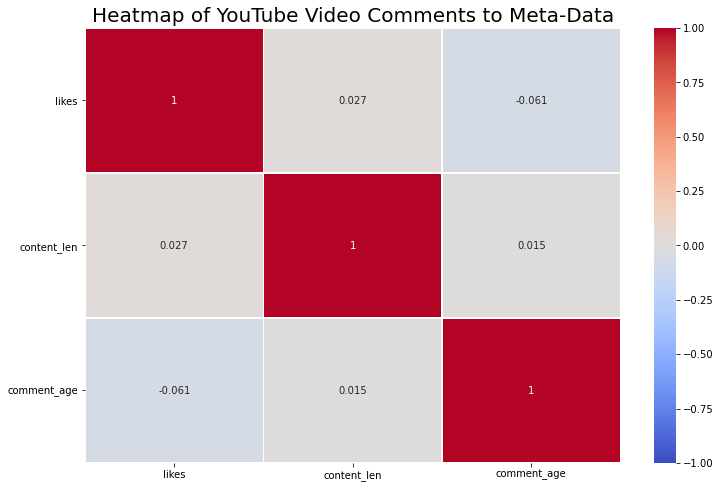

In [54]:
plt.figure(figsize=[12,8])
plt.title("Heatmap of YouTube Video Comments to Meta-Data", size=20)
sns.heatmap(df_yt_comments_sel[["likes", "content_len", "comment_age"]].corr(), annot=True, cmap="coolwarm",
            vmin=-1, vmax=1, linewidths=0.5)
plt.yticks(rotation=0)
plt.savefig("../assets/ytcomm_heatmap.png", transparent=True, bbox_inches='tight')
plt.show()

None of the features appear to be correlated to the number of likes a comment receives.

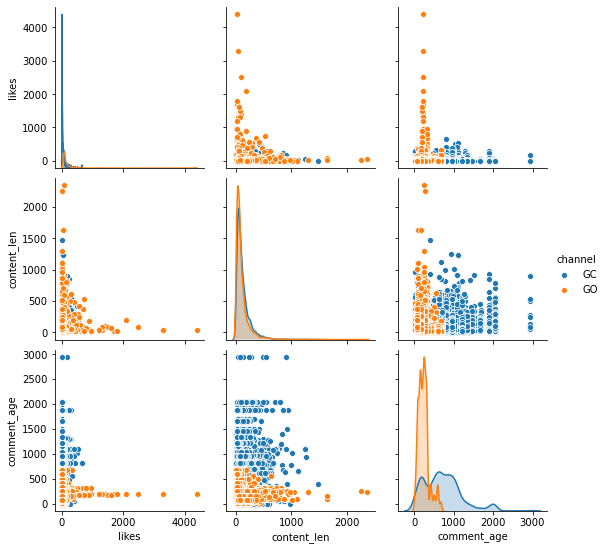

In [55]:
sns.pairplot(data=df_yt_comments_sel, x_vars=["likes", "content_len", "comment_age"],
             y_vars=["likes", "content_len", "comment_age"], hue="channel")
plt.savefig("../assets/ytcomm_pairplot.png", transparent=True, bbox_inches='tight')
plt.show()

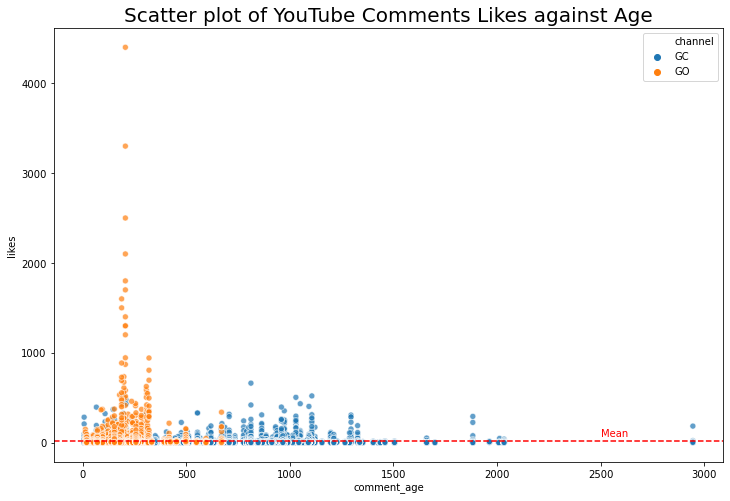

In [56]:
plt.figure(figsize=[12,8])
plt.title("Scatter plot of YouTube Comments Likes against Age", size=20)
sns.scatterplot(data=df_yt_comments_sel, x="comment_age", y="likes", hue="channel", alpha=0.7)
plt.axhline(y=df_yt_comments_sel["likes"].mean(), color='r', linestyle='--')
plt.text(2500, df_yt_comments_sel["likes"].mean()+50, "Mean", color="r", size=10)
plt.savefig("../assets/ytcomm_likes_age.png", transparent=True, bbox_inches='tight')
plt.show()

The number of likes a YouTube comment receives appear to be sporadic relative to the age. A sudden surge in number of likes for comments is most likely related to the number of views and likes the video the comment is responding to has received. This would explain the big jump for some of the comments on Ghib Ojisan's videos, and why they all seem to occur at about the same age/day.

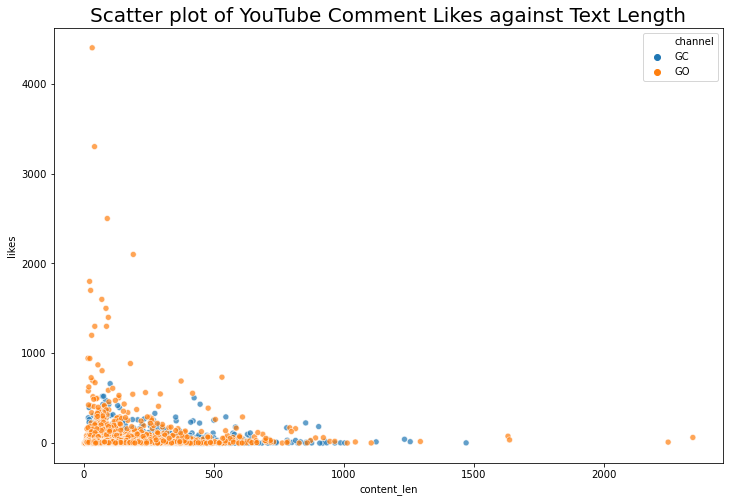

In [57]:
plt.figure(figsize=[12,8])
plt.title("Scatter plot of YouTube Comment Likes against Text Length", size=20)
sns.scatterplot(data=df_yt_comments_sel, x="content_len", y="likes", hue="channel", alpha=0.7)
plt.savefig("../assets/ytcomm_likes_len.png", transparent=True, bbox_inches='tight')
plt.show()

For comments on YouTube, ther is a clear downtrend between length of the comment and the number of likes received. Long and wordy comments most likely lack the hook to draw in readers and would end up being skipped over.

### Merging Considerations

What is the best way for us to merge our word features and the number of likes for our Instagram, YouTube video, and YouTube comments? After all, they are all of different distributions and scale, so we should not simply concatenate the dataset without qualifying our number of likes somehow.

In [58]:
df_insta_sel.head(1)

,post_id,post_slug,unix_time,date_time,post_caption,hashtags,topic_tags,is_video,is_ad,post_likes,...,post_caption_clean,post_caption_drop_target,post_caption_drop_hash,at_tags,useful_tags,tags,content,post_age,hash_count,content_len
0,1006641971264095607,34T4oZMgV3,1434221095,2015-06-13 18:44:55,Oh look! Natural heart shaped form of Ivan Hen...,"['#pinkdotsg', '#whereloveslivesg', '#rediscov...",['2 people.'],False,False,40,...,oh look natural heart shaped form ivan heng gl...,oh look natural heart shaped form ivan heng gl...,oh look natural heart shaped form ivan heng gl...,NaN,NaN,NaN,oh look natural heart shaped form ivan heng gl...,1958,18,326.0


In [59]:
df_insta_sel["post_likes"].describe()

count    14256.000000
mean       113.632225
std        289.869303
min          0.000000
25%         18.000000
50%         40.000000
75%         92.000000
max       8247.000000
Name: post_likes, dtype: float64

In [60]:
df_yt_sel.head(1)

,video_title,video_caption,date_time,video_slug,video_views,video_likes,video_dislikes,video_comments,video_title_clean,video_caption_clean,content,channel,video_age,content_len
0,HALLOWEEN HORROR NIGHTS 8 AT UNIVERSAL STUDIOS! 👻,['UNIVERSAL HALLOWEEN HORROR NIGHTS 8! 👻\n\nHa...,2018-10-31,7xkdm3c4Ks8,8766,271,3,18,halloween horror nights 8 universal studios,'universal halloween horror nights 8 happy hal...,halloween horror nights 8 universal studios 'u...,GC,718,1277


In [61]:
df_yt_sel["video_likes"].describe()

count      248.000000
mean      1408.713710
std       1441.581153
min          0.000000
25%        553.750000
50%       1053.000000
75%       1718.500000
max      13913.000000
Name: video_likes, dtype: float64

In [62]:
df_yt_comments_sel.head(1)

,response_to,user,timestamp,comment,likes,replies_attracted,comment_clean,channel,date_time,date_time_2,comment_age,content_len
0,HALLOWEEN HORROR NIGHTS 8 AT UNIVERSAL STUDIOS! 👻,thattham,1 year ago,"I was a scare actor in killuminati, we hope u ...",4,CLAIM NOW!,scare actor killuminati hope u liked,GC,2018-10-31,2018-10-31,718.0,60


In [63]:
df_yt_comments_sel["likes"].describe()

count    10590.000000
mean        19.679603
std         90.542812
min          0.000000
25%          0.000000
50%          3.000000
75%         12.000000
max       4400.000000
Name: likes, dtype: float64

In [64]:
df_platform_insta = df_insta_sel[["post_likes"]]
df_platform_insta["platform"] = "Instagram Posts"
df_platform_insta.rename(columns={"post_likes": "likes"}, inplace=True)
df_platform_insta.head(1)

<ipython-input-64-edbf5c83064c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_platform_insta["platform"] = "Instagram Posts"
C:\Users\yewto\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,likes,platform
0,40,Instagram Posts


In [65]:
df_platform_yt = df_yt_sel[["video_likes"]]
df_platform_yt["platform"] = "YouTube Videos"
df_platform_yt.rename(columns={"video_likes": "likes"}, inplace=True)
df_platform_yt.head(1)

<ipython-input-65-b03b13ab1473>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_platform_yt["platform"] = "YouTube Videos"
C:\Users\yewto\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,likes,platform
0,271,YouTube Videos


In [66]:
df_platform_yt_comments = df_yt_comments_sel[["likes"]]
df_platform_yt_comments["platform"] = "YouTube Comments"
df_platform_yt_comments.head(1)

<ipython-input-66-24353f300751>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_platform_yt_comments["platform"] = "YouTube Comments"


,likes,platform
0,4,YouTube Comments


In [67]:
df_platforms_likes = pd.concat([df_platform_insta, df_platform_yt, df_platform_yt_comments]).reset_index(drop=True)
df_platforms_likes.shape

(25094, 2)

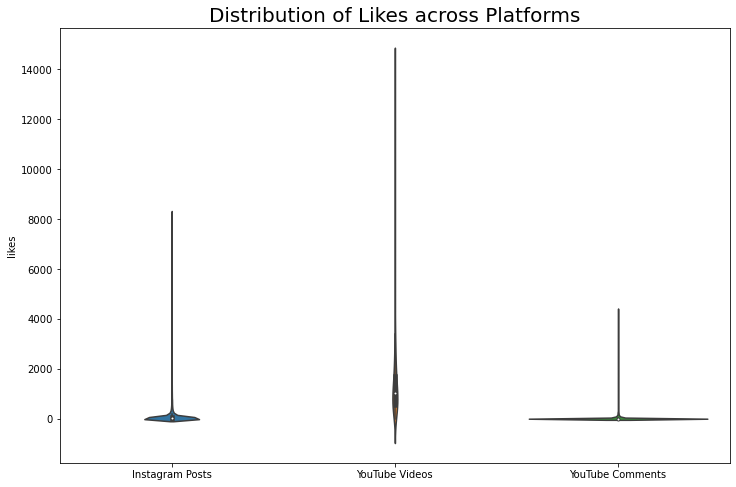

In [68]:
plt.figure(figsize=[12,8])
plt.title("Distribution of Likes across Platforms", size=20)

sns.violinplot(data=df_platforms_likes, x="platform", y="likes")
plt.xlabel("")

plt.show()

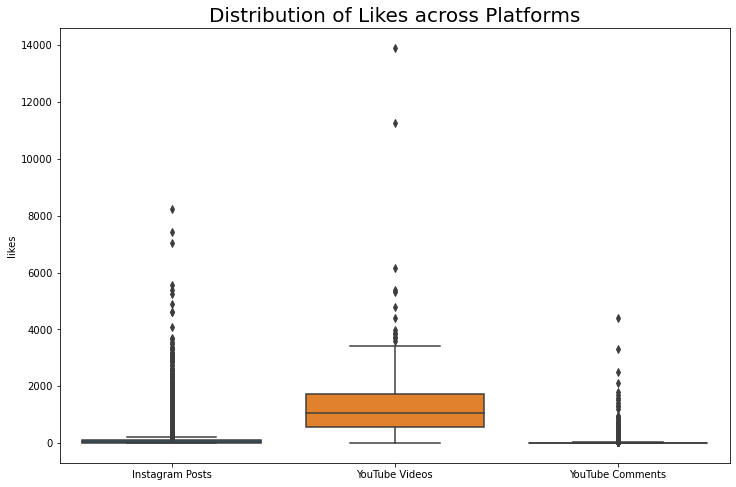

In [69]:
plt.figure(figsize=[12,8])
plt.title("Distribution of Likes across Platforms", size=20)

sns.boxplot(data=df_platforms_likes, x="platform", y="likes")
plt.xlabel("")

plt.show()

After concatenating the content column and the number of likes, we can compare the distribution of likes alongside each of the platform. The difference is significant. One method to resolve this problem is to rescale our likes so they can all be evaluated at the same level.

#### Test Scalers

We will be testing three different types of scalers in this section.

`MinMaxScaler` rescales the data set such that all feature values are in the range 0-1. This scaling compresses all inliers into a narrow range of values. `StandardScaler` removes the mean and scales the data to unit variance. Outliers have an influence when computing the empirical mean and standard deviation which shrink the range of the target variables. `RobustScaler` centres and scales based on percentiles and are therefore not influenced by a few number of very large marginal outliers.

In [70]:
# create platform groupby objs
platforms = df_platforms_likes.groupby("platform")

# scale with min-max scaler
mm = MinMaxScaler()
insta_mm = mm.fit_transform(platforms.get_group("Instagram Posts")["likes"].values.reshape(-1,1))
yt_mm = mm.transform(platforms.get_group("YouTube Videos")["likes"].values.reshape(-1,1))
yt_comments_mm = mm.transform(platforms.get_group("YouTube Comments")["likes"].values.reshape(-1,1))

# reshape to list form
insta_mm = insta_mm.reshape(1,-1).tolist()[0]
yt_mm = yt_mm.reshape(1,-1).tolist()[0]
yt_comments_mm = yt_comments_mm.reshape(1,-1).tolist()[0]

# append and assigned scaled likes
scaled_mm = [] # create empty list
scaled_mm.extend(insta_mm)
scaled_mm.extend(yt_mm)
scaled_mm.extend(yt_comments_mm)
df_platforms_likes["likes_mm"] = scaled_mm
df_platforms_likes.head(3) # view final df

,likes,platform,likes_mm
0,40,Instagram Posts,0.004850
1,33,Instagram Posts,0.004001
2,3,Instagram Posts,0.000364


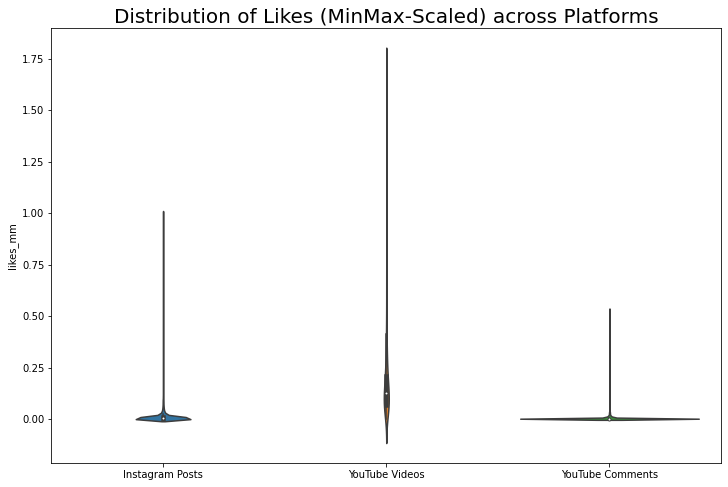

In [71]:
plt.figure(figsize=[12,8])
plt.title("Distribution of Likes (MinMax-Scaled) across Platforms", size=20)

sns.violinplot(data=df_platforms_likes, x="platform", y="likes_mm")
plt.xlabel("")

plt.show()

In [72]:
# create platform groupby objs
platforms = df_platforms_likes.groupby("platform")

# scale with standard scaler
ss = StandardScaler()
insta_ss = ss.fit_transform(platforms.get_group("Instagram Posts")["likes"].values.reshape(-1,1))
yt_ss = ss.transform(platforms.get_group("YouTube Videos")["likes"].values.reshape(-1,1))
yt_comments_ss = ss.transform(platforms.get_group("YouTube Comments")["likes"].values.reshape(-1,1))

# reshape to list form
insta_ss = insta_ss.reshape(1,-1).tolist()[0]
yt_ss = yt_ss.reshape(1,-1).tolist()[0]
yt_comments_ss = yt_comments_ss.reshape(1,-1).tolist()[0]

# append and assigned scaled likes
scaled_ss = [] # create empty list
scaled_ss.extend(insta_ss)
scaled_ss.extend(yt_ss)
scaled_ss.extend(yt_comments_ss)
df_platforms_likes["likes_ss"] = scaled_ss
df_platforms_likes.head(3) # view final df

,likes,platform,likes_mm,likes_ss
0,40,Instagram Posts,0.004850,-0.254028
1,33,Instagram Posts,0.004001,-0.278177
2,3,Instagram Posts,0.000364,-0.381676


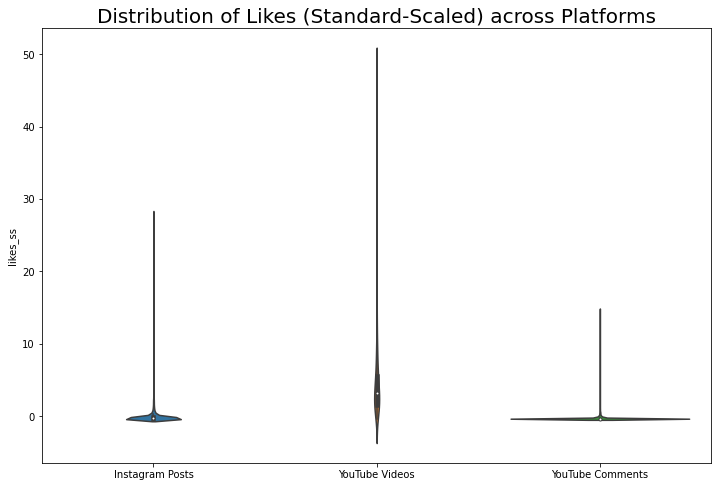

In [73]:
plt.figure(figsize=[12,8])
plt.title("Distribution of Likes (Standard-Scaled) across Platforms", size=20)

sns.violinplot(data=df_platforms_likes, x="platform", y="likes_ss")
plt.xlabel("")

plt.show()

In [74]:
# create platform groupby objs
platforms = df_platforms_likes.groupby("platform")

# scale with robust scaler
rs = RobustScaler()
insta_rs = rs.fit_transform(platforms.get_group("Instagram Posts")["likes"].values.reshape(-1,1))
yt_rs = rs.transform(platforms.get_group("YouTube Videos")["likes"].values.reshape(-1,1))
yt_comments_rs = rs.transform(platforms.get_group("YouTube Comments")["likes"].values.reshape(-1,1))

# reshape to list form
insta_rs = insta_rs.reshape(1,-1).tolist()[0]
yt_rs = yt_rs.reshape(1,-1).tolist()[0]
yt_comments_rs = yt_comments_rs.reshape(1,-1).tolist()[0]

# append and assigned scaled likes
scaled_rs = [] # create empty list
scaled_rs.extend(insta_rs)
scaled_rs.extend(yt_rs)
scaled_rs.extend(yt_comments_rs)
df_platforms_likes["likes_rs"] = scaled_rs
df_platforms_likes.head(3) # view final df

,likes,platform,likes_mm,likes_ss,likes_rs
0,40,Instagram Posts,0.004850,-0.254028,0.000000
1,33,Instagram Posts,0.004001,-0.278177,-0.094595
2,3,Instagram Posts,0.000364,-0.381676,-0.500000


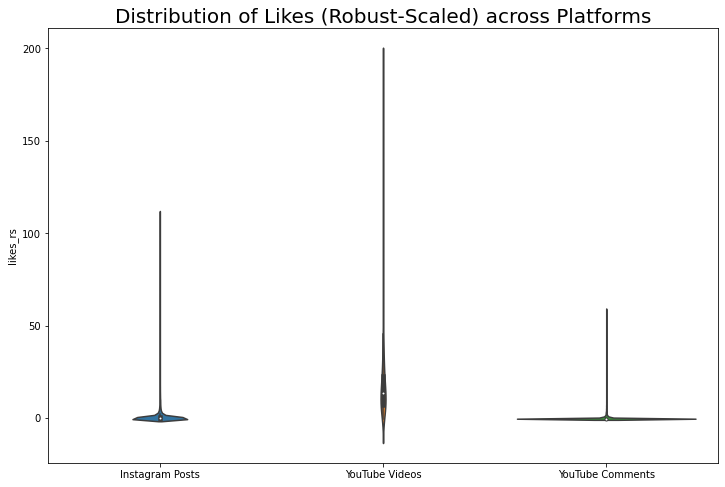

In [75]:
plt.figure(figsize=[12,8])
plt.title("Distribution of Likes (Robust-Scaled) across Platforms", size=20)

sns.violinplot(data=df_platforms_likes, x="platform", y="likes_rs")
plt.xlabel("")

plt.show()

As we are scaling the entire range of likes as a whole using the same scaler object, all we have accomplished is to rescale the range of the likes without rescaling their distribution. As such, the differences in distribution remains and we are still unable to evaluate likes on the same level and platform-independent. Let us redo our scaling, this time using individual scalers for each distribution of likes.

#### Test Individual Scalers

In [76]:
# create platform groupby objs
platforms = df_platforms_likes.groupby("platform")

# scale with min-max scaler
mm = MinMaxScaler()
insta_mm = mm.fit_transform(platforms.get_group("Instagram Posts")["likes"].values.reshape(-1,1))
mm = MinMaxScaler()
yt_mm = mm.fit_transform(platforms.get_group("YouTube Videos")["likes"].values.reshape(-1,1))
mm = MinMaxScaler()
yt_comments_mm = mm.fit_transform(platforms.get_group("YouTube Comments")["likes"].values.reshape(-1,1))

# reshape to list form
insta_mm = insta_mm.reshape(1,-1).tolist()[0]
yt_mm = yt_mm.reshape(1,-1).tolist()[0]
yt_comments_mm = yt_comments_mm.reshape(1,-1).tolist()[0]

# append and assigned scaled likes
scaled_mm = [] # create empty list
scaled_mm.extend(insta_mm)
scaled_mm.extend(yt_mm)
scaled_mm.extend(yt_comments_mm)
df_platforms_likes["likes_mm_ind"] = scaled_mm
df_platforms_likes.head(3) # view final df

,likes,platform,likes_mm,likes_ss,likes_rs,likes_mm_ind
0,40,Instagram Posts,0.004850,-0.254028,0.000000,0.004850
1,33,Instagram Posts,0.004001,-0.278177,-0.094595,0.004001
2,3,Instagram Posts,0.000364,-0.381676,-0.500000,0.000364


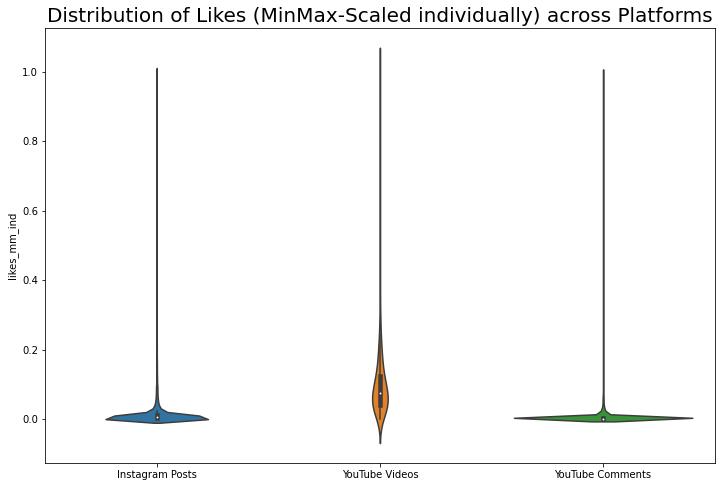

In [77]:
plt.figure(figsize=[12,8])
plt.title("Distribution of Likes (MinMax-Scaled individually) across Platforms", size=20)

sns.violinplot(data=df_platforms_likes, x="platform", y="likes_mm_ind")
plt.xlabel("")

plt.savefig("../assets/platform_scale_mm.png", transparent=True, bbox_inches='tight')
plt.show()

In [78]:
# create platform groupby objs
platforms = df_platforms_likes.groupby("platform")

# scale with standard scaler
ss = StandardScaler()
insta_ss = ss.fit_transform(platforms.get_group("Instagram Posts")["likes"].values.reshape(-1,1))
ss = StandardScaler()
yt_ss = ss.fit_transform(platforms.get_group("YouTube Videos")["likes"].values.reshape(-1,1))
ss = StandardScaler()
yt_comments_ss = ss.fit_transform(platforms.get_group("YouTube Comments")["likes"].values.reshape(-1,1))

# reshape to list form
insta_ss = insta_ss.reshape(1,-1).tolist()[0]
yt_ss = yt_ss.reshape(1,-1).tolist()[0]
yt_comments_ss = yt_comments_ss.reshape(1,-1).tolist()[0]

# append and assigned scaled likes
scaled_ss = [] # create empty list
scaled_ss.extend(insta_ss)
scaled_ss.extend(yt_ss)
scaled_ss.extend(yt_comments_ss)
df_platforms_likes["likes_ss_ind"] = scaled_ss
df_platforms_likes.head(3) # view final df

,likes,platform,likes_mm,likes_ss,likes_rs,likes_mm_ind,likes_ss_ind
0,40,Instagram Posts,0.004850,-0.254028,0.000000,0.004850,-0.254028
1,33,Instagram Posts,0.004001,-0.278177,-0.094595,0.004001,-0.278177
2,3,Instagram Posts,0.000364,-0.381676,-0.500000,0.000364,-0.381676


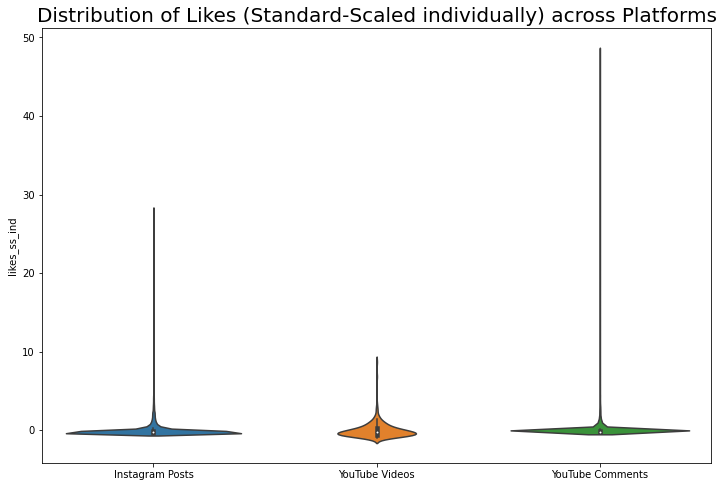

In [79]:
plt.figure(figsize=[12,8])
plt.title("Distribution of Likes (Standard-Scaled individually) across Platforms", size=20)

sns.violinplot(data=df_platforms_likes, x="platform", y="likes_ss_ind")
plt.xlabel("")

plt.savefig("../assets/platform_scale_ss.png", transparent=True, bbox_inches='tight')
plt.show()

In [80]:
# create platform groupby objs
platforms = df_platforms_likes.groupby("platform")

# scale with robust scaler
rs = RobustScaler()
insta_rs = rs.fit_transform(platforms.get_group("Instagram Posts")["likes"].values.reshape(-1,1))
rs = RobustScaler()
yt_rs = rs.fit_transform(platforms.get_group("YouTube Videos")["likes"].values.reshape(-1,1))
rs = RobustScaler()
yt_comments_rs = rs.fit_transform(platforms.get_group("YouTube Comments")["likes"].values.reshape(-1,1))

# reshape to list form
insta_rs = insta_rs.reshape(1,-1).tolist()[0]
yt_rs = yt_rs.reshape(1,-1).tolist()[0]
yt_comments_rs = yt_comments_rs.reshape(1,-1).tolist()[0]

# append and assigned scaled likes
scaled_rs = [] # create empty list
scaled_rs.extend(insta_rs)
scaled_rs.extend(yt_rs)
scaled_rs.extend(yt_comments_rs)
df_platforms_likes["likes_rs_ind"] = scaled_rs
df_platforms_likes.head(3) # view final df

,likes,platform,likes_mm,likes_ss,likes_rs,likes_mm_ind,likes_ss_ind,likes_rs_ind
0,40,Instagram Posts,0.004850,-0.254028,0.000000,0.004850,-0.254028,0.000000
1,33,Instagram Posts,0.004001,-0.278177,-0.094595,0.004001,-0.278177,-0.094595
2,3,Instagram Posts,0.000364,-0.381676,-0.500000,0.000364,-0.381676,-0.500000


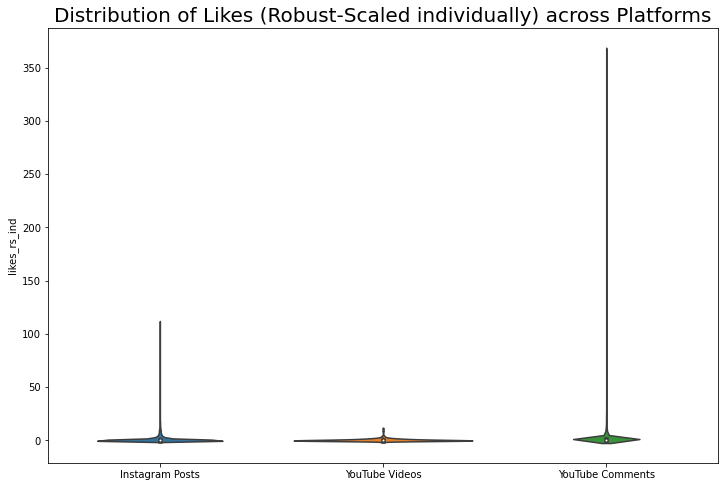

In [81]:
plt.figure(figsize=[12,8])
plt.title("Distribution of Likes (Robust-Scaled individually) across Platforms", size=20)

sns.violinplot(data=df_platforms_likes, x="platform", y="likes_rs_ind")
plt.xlabel("")

plt.savefig("../assets/platform_scale_rs.png", transparent=True, bbox_inches='tight')
plt.show()

The difference is much more pronounced this time. We have not only rescaled each platform likes range of values, we have also reshaped their distributions so that the model can train on these target variables more fairly.

From the above violin plots, the scaler of our choice would have to be `MinMaxScaler` since it able to produce the greatest spread in the the distribution of likes for all platforms, allowing our model to be more sensitive to a fuller range of target variables and to pick up the right incentives to learn each word feature.

### Merge DataFrames for Baseline Model

In [82]:
print(df_insta_sel.shape)
df_insta_sel.head(1)

(14256, 28)


,post_id,post_slug,unix_time,date_time,post_caption,hashtags,topic_tags,is_video,is_ad,post_likes,...,post_caption_clean,post_caption_drop_target,post_caption_drop_hash,at_tags,useful_tags,tags,content,post_age,hash_count,content_len
0,1006641971264095607,34T4oZMgV3,1434221095,2015-06-13 18:44:55,Oh look! Natural heart shaped form of Ivan Hen...,"['#pinkdotsg', '#whereloveslivesg', '#rediscov...",['2 people.'],False,False,40,...,oh look natural heart shaped form ivan heng gl...,oh look natural heart shaped form ivan heng gl...,oh look natural heart shaped form ivan heng gl...,NaN,NaN,NaN,oh look natural heart shaped form ivan heng gl...,1958,18,326.0


In [83]:
print(df_yt_sel.shape)
df_yt_sel.head(1)

(248, 14)


,video_title,video_caption,date_time,video_slug,video_views,video_likes,video_dislikes,video_comments,video_title_clean,video_caption_clean,content,channel,video_age,content_len
0,HALLOWEEN HORROR NIGHTS 8 AT UNIVERSAL STUDIOS! 👻,['UNIVERSAL HALLOWEEN HORROR NIGHTS 8! 👻\n\nHa...,2018-10-31,7xkdm3c4Ks8,8766,271,3,18,halloween horror nights 8 universal studios,'universal halloween horror nights 8 happy hal...,halloween horror nights 8 universal studios 'u...,GC,718,1277


In [84]:
print(df_yt_comments_sel.shape)
df_yt_comments_sel.head(1)

(10590, 12)


,response_to,user,timestamp,comment,likes,replies_attracted,comment_clean,channel,date_time,date_time_2,comment_age,content_len
0,HALLOWEEN HORROR NIGHTS 8 AT UNIVERSAL STUDIOS! 👻,thattham,1 year ago,"I was a scare actor in killuminati, we hope u ...",4,CLAIM NOW!,scare actor killuminati hope u liked,GC,2018-10-31,2018-10-31,718.0,60


#### Add Platforms Identifier

In [85]:
# add platform col
df_insta_sel["platform"] = "Instagram Posts"
df_insta_sel.shape # verify col added

(14256, 29)

In [86]:
# add platform col
df_yt_sel["platform"] = "YouTube Videos"
df_yt_sel.shape # verify col added

(248, 15)

In [87]:
# add platform col
df_yt_comments_sel["platform"] = "YouTube Comments"
df_yt_comments_sel.shape # verify col added

(10590, 13)

#### Merge Likes with all hashtags

In [88]:
# compile content
content = []
content.extend(df_insta_sel["content"])
content.extend(df_yt_sel["content"])
content.extend(df_yt_comments_sel["comment_clean"])

# compile likes
likes = []
likes.extend(df_insta_sel["post_likes"])
likes.extend(df_yt_sel["video_likes"])
likes.extend(df_yt_comments_sel["likes"])

# complie platform
platform = []
platform.extend(df_insta_sel["platform"])
platform.extend(df_yt_sel["platform"])
platform.extend(df_yt_comments_sel["platform"])

# merge extracted data
df_merged = pd.DataFrame({"content": content, "likes": likes, "platform": platform})
df_merged.head(3)

,content,likes,platform
0,oh look natural heart shaped form ivan heng gl...,40,Instagram Posts
1,#exploresingapore #instasg #gfsingapore #gameo...,33,Instagram Posts
2,road hell reliving haw par villa 15 16 22 23 m...,3,Instagram Posts


In [89]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25094 entries, 0 to 25093
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   24177 non-null  object
 1   likes     25094 non-null  int64 
 2   platform  25094 non-null  object
dtypes: int64(1), object(2)
memory usage: 588.3+ KB


In [90]:
# noticed some missing content
# let's drop them
df_merged.dropna(inplace=True)

In [91]:
df_merged.shape

(24177, 3)

In [92]:
# save out merged df for modelling
df_merged.to_csv("../datasets/df_merged.csv", index=False)

#### Drop Target Hashtags

We want to drop the target hashtags since our dataset would be biased towards the target hashtags we used to query our Instagram posts.

In [93]:
# join string if there are both tags and captions
mask = df_insta_sel["post_caption_drop_target"].notnull() & df_insta_sel["tags"].notnull()
df_insta_sel.loc[mask, "content_drop_target"] = df_insta_sel.loc[mask, "post_caption_drop_target"] + " " + df_insta_sel.loc[mask, "tags"]

# add tags if they are the only NLP feature present
mask = df_insta_sel["post_caption_drop_target"].isnull() & df_insta_sel["tags"].notnull()
df_insta_sel.loc[mask, "content_drop_target"] = df_insta_sel.loc[mask, "tags"]

# add captions if they are the only NLP feature present
mask = df_insta_sel["post_caption_drop_target"].notnull() & df_insta_sel["tags"].isnull()
df_insta_sel.loc[mask, "content_drop_target"] = df_insta_sel.loc[mask, "post_caption_drop_target"]

df_insta_sel.shape # verify new col added

(14256, 30)

In [94]:
df_insta_sel["content_drop_target"].isnull().sum() # check if there are missing values

93

In [95]:
df_insta_sel[df_insta_sel["content_drop_target"].isnull()]

,post_id,post_slug,unix_time,date_time,post_caption,hashtags,topic_tags,is_video,is_ad,post_likes,...,post_caption_drop_hash,at_tags,useful_tags,tags,content,post_age,hash_count,content_len,platform,content_drop_target
253,81927368,E4hzI,1306671117,2011-05-29 12:11:57,NaN,NaN,"['Photo by 🥂🍾🤳🏻🍽🍻☕️🍱📷 •Serena• on May 29', '20...",False,False,6,...,NaN,NaN,NaN,NaN,NaN,3434,0,NaN,Instagram Posts,NaN
261,91740491,Fd9lL,1307686593,2011-06-10 06:16:33,NaN,NaN,"['Photo by Phy 🌈 on June 09', '2011.']",False,False,436,...,NaN,NaN,NaN,NaN,NaN,3422,0,NaN,Instagram Posts,NaN
307,87868345,FPMO5,1307283768,2011-06-05 14:22:48,#rediscoversg,[''],"['Photo by glynis on June 05', '2011.']",False,False,27,...,NaN,NaN,NaN,NaN,#rediscoversg,3427,0,13.0,Instagram Posts,NaN
482,14586262,3pGW,1294207075,2011-01-05 05:57:55,AM,NaN,"['Photo by Vu Lam on January 04', '2011.']",False,False,11,...,NaN,NaN,NaN,NaN,NaN,3578,0,NaN,Instagram Posts,NaN
926,84998561,FEPmh,1307013387,2011-06-02 11:16:27,NaN,NaN,"['Photo by Us Ennovy on June 02', '2011.']",False,False,46,...,NaN,NaN,NaN,NaN,NaN,3430,0,NaN,Instagram Posts,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13685,2421196468084776048,CGZ0VwTn5xw,1602849132,2020-10-16 11:52:12,NaN,NaN,"['1 person', 'st', 'ing', 'outdoor.']",False,False,83,...,NaN,NaN,NaN,NaN,NaN,6,0,NaN,Instagram Posts,NaN
13841,2419751213208632267,CGUruh0HvvL,1602676844,2020-10-14 12:00:44,NaN,NaN,"['one or more people', 'outdoor.']",False,False,98,...,NaN,NaN,NaN,NaN,NaN,8,0,NaN,Instagram Posts,NaN
14096,2424822906583007889,CGms5YWHEKR,1603281437,2020-10-21 11:57:17,NaN,NaN,"['1 person', 'st', 'ing', 'outdoor.']",False,False,44,...,NaN,NaN,NaN,NaN,NaN,1,0,NaN,Instagram Posts,NaN
14171,2393732475442760661,CE4PwD-FQvV,1599575169,2020-09-08 14:26:09,#SingapoRediscovers,[''],NaN,False,False,69,...,NaN,NaN,NaN,NaN,#singaporediscovers,44,0,19.0,Instagram Posts,NaN


In [96]:
# posts with missing values are those with only target hashtags in their captions
# since there are only 29 such posts, let's drop them
df_insta_drop_targets = df_insta_sel.drop(df_insta_sel[df_insta_sel["content_drop_target"].isnull()].index).reset_index(drop=True)
df_insta_drop_targets.head(3)

,post_id,post_slug,unix_time,date_time,post_caption,hashtags,topic_tags,is_video,is_ad,post_likes,...,post_caption_drop_hash,at_tags,useful_tags,tags,content,post_age,hash_count,content_len,platform,content_drop_target
0,1006641971264095607,34T4oZMgV3,1434221095,2015-06-13 18:44:55,Oh look! Natural heart shaped form of Ivan Hen...,"['#pinkdotsg', '#whereloveslivesg', '#rediscov...",['2 people.'],False,False,40,...,oh look natural heart shaped form ivan heng gl...,NaN,NaN,NaN,oh look natural heart shaped form ivan heng gl...,1958,18,326.0,Instagram Posts,oh look natural heart shaped form ivan heng gl...
1,1202880298563729182,BCxfUInNPce,1457614527,2016-03-10 12:55:27,.\n.\n.\n.\n.\n.\n#exploresingapore #instasg #...,"['#exploresingapore', '#instasg', '#gf_singapo...",['indoor.'],False,False,33,...,NaN,NaN,indoor,indoor,#exploresingapore #instasg #gfsingapore #gameo...,1687,21,274.0,Instagram Posts,#exploresingapore #instasg #gfsingapore #gameo...
2,677102977071319026,lljZH4sgfy,1394936986,2014-03-16 02:29:46,On the road to hell..... Reliving Haw Par Vill...,"['', '#singapore']",['Photo by Belinda Tan in 虎豹别墅.'],False,False,3,...,road hell reliving haw par villa 15 16 22 23 m...,NaN,NaN,NaN,road hell reliving haw par villa 15 16 22 23 m...,2412,1,95.0,Instagram Posts,road hell reliving haw par villa 15 16 22 23 m...


In [97]:
# compile content
content = []
content.extend(df_insta_drop_targets["content_drop_target"])
content.extend(df_yt_sel["content"])
content.extend(df_yt_comments_sel["comment_clean"])

# compile likes
likes = []
likes.extend(df_insta_drop_targets["post_likes"])
likes.extend(df_yt_sel["video_likes"])
likes.extend(df_yt_comments_sel["likes"])

# compile platform
platform = []
platform.extend(df_insta_drop_targets["platform"])
platform.extend(df_yt_sel["platform"])
platform.extend(df_yt_comments_sel["platform"])

# merge extracted data
df_merged_drop_targets = pd.DataFrame({"content": content, "likes": likes, "platform": platform})
df_merged_drop_targets.head(3)

,content,likes,platform
0,oh look natural heart shaped form ivan heng gl...,40,Instagram Posts
1,#exploresingapore #instasg #gfsingapore #gameo...,33,Instagram Posts
2,road hell reliving haw par villa 15 16 22 23 m...,3,Instagram Posts


In [98]:
df_merged_drop_targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25001 entries, 0 to 25000
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   24146 non-null  object
 1   likes     25001 non-null  int64 
 2   platform  25001 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [99]:
# noticed some missing content
# let's drop them
df_merged_drop_targets.dropna(inplace=True)

In [100]:
df_merged_drop_targets.shape

(24146, 3)

In [101]:
# save out merged df for modelling
df_merged_drop_targets.to_csv("../datasets/df_merged_drop_targets.csv", index=False)

#### Drop All Hashtags

In case dropping target hashtags is not enough, let us prepare another dataframe where we drop all the hashtags.

The reason for this is because hashtagging often serves a topic-signalling function and usually void of meaning. Not only that, Instagram posts are often overwhelmed with hashtags because they are abused to increase visibility of posts. As such, our model may end up learning the most about hashtagging rather than the other more meaningful word features.

However, an argument can be made for keeping the hashtags in our training set. Since they perform as we said to increase visibility, their usage should therefore be a key predictor to predicting likes/popularity. Therefore, dropping all hashtags in such an extreme manner may cost our model a better predictive performance.

Considering both reasonings, our main dataframe would remain the one with only the target hashtags dropped while we retain this as backup since it is as yet unclear how well our model would perform.

In [102]:
# join string if there are both tags and captions
mask = df_insta_sel["post_caption_drop_hash"].notnull() & df_insta_sel["tags"].notnull()
df_insta_sel.loc[mask, "content_drop_hash"] = df_insta_sel.loc[mask, "post_caption_drop_hash"] + " " + df_insta_sel.loc[mask, "tags"]

# add tags if they are the only NLP feature present
mask = df_insta_sel["post_caption_drop_hash"].isnull() & df_insta_sel["tags"].notnull()
df_insta_sel.loc[mask, "content_drop_hash"] = df_insta_sel.loc[mask, "tags"]

# add captions if they are the only NLP feature present
mask = df_insta_sel["post_caption_drop_hash"].notnull() & df_insta_sel["tags"].isnull()
df_insta_sel.loc[mask, "content_drop_hash"] = df_insta_sel.loc[mask, "post_caption_drop_hash"]

df_insta_sel.shape # verify new col added

(14256, 31)

In [103]:
df_insta_sel["content_drop_hash"].isnull().sum() # check if there are missing values

579

In [104]:
df_insta_sel[df_insta_sel["content_drop_hash"].isnull()]

,post_id,post_slug,unix_time,date_time,post_caption,hashtags,topic_tags,is_video,is_ad,post_likes,...,at_tags,useful_tags,tags,content,post_age,hash_count,content_len,platform,content_drop_target,content_drop_hash
15,85179286,FE7uW,1307031887,2011-06-02 16:24:47,#window#nightlights#bokeh,"['#window', '#nightlights', '#bokeh']","['Photo by Keith Teoh on June 02', '2011.']",False,False,3,...,NaN,NaN,NaN,#window#nightlights#bokeh,3430,3,25.0,Instagram Posts,#window#nightlights#bokeh,NaN
25,1035418687314917254,5ei89rNPeG,1437651547,2015-07-23 11:39:07,#singapore #instagramsg #instasg #igsg #sgig #...,"['#singapore', '#instagramsg', '#instasg', '#i...","['Photo by 无名 on July 23', '2015.']",False,False,22,...,NaN,NaN,NaN,#singapore #instagramsg #instasg #igsg #sgig #...,1918,19,220.0,Instagram Posts,#singapore #instagramsg #instasg #igsg #sgig #...,NaN
43,1051534393206961264,6XzPWYNPRw,1439572689,2015-08-14 17:18:09,#singapore #instagramsg #instasg #latergram #i...,"['#singapore', '#instagramsg', '#instasg', '#l...","['Photo by 无名 on August 14', '2015.']",False,False,31,...,NaN,NaN,NaN,#singapore #instagramsg #instasg #latergram #i...,1896,16,171.0,Instagram Posts,#singapore #instagramsg #instasg #latergram #i...,NaN
57,667312776069576304,lCxW8rtPZw,1393769903,2014-03-02 14:18:23,#singapore #sgmemory #archivingsg #rediscovers...,"['#singapore', '#sgmemory', '#archivingsg', ''...",['Photo by 无名 in Singapore.'],False,False,25,...,NaN,NaN,NaN,#singapore #sgmemory #archivingsg #rediscovers...,2426,14,157.0,Instagram Posts,#singapore #sgmemory #archivingsg #sghistory ...,NaN
67,975719081396944236,2Kc1W_PD1s,1430534800,2015-05-02 02:46:40,#multicultural #singapore #uniquelysingapore #...,"['#multicultural', '#singapore', '#uniquelysin...","[""Photo by Elaine - Can't Stop Traveling on Ma...",False,False,3,...,NaN,NaN,NaN,#multicultural #singapore #uniquelysingapore #...,2000,6,88.0,Instagram Posts,#multicultural #singapore #uniquelysingapore #...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14096,2424822906583007889,CGms5YWHEKR,1603281437,2020-10-21 11:57:17,NaN,NaN,"['1 person', 'st', 'ing', 'outdoor.']",False,False,44,...,NaN,NaN,NaN,NaN,1,0,NaN,Instagram Posts,NaN,NaN
14171,2393732475442760661,CE4PwD-FQvV,1599575169,2020-09-08 14:26:09,#SingapoRediscovers,[''],NaN,False,False,69,...,NaN,NaN,NaN,#singaporediscovers,44,0,19.0,Instagram Posts,NaN,NaN
14219,2424855839822009231,CGm0Yn0H1OP,1603285363,2020-10-21 13:02:43,#superlative #igsg #singapore #sgig #instasg #...,"['#superlative', '#igsg', '#singapore', '#sgig...","['one or more people', 'people sitting', 'outd...",False,False,56,...,NaN,NaN,NaN,#superlative #igsg #singapore #sgig #instasg #...,1,29,410.0,Instagram Posts,#superlative #igsg #singapore #sgig #instasg #...,NaN
14234,2424587339589071607,CGl3VbfHbL3,1603253355,2020-10-21 04:09:15,来到香港,NaN,NaN,False,False,36,...,NaN,NaN,NaN,NaN,1,0,NaN,Instagram Posts,NaN,NaN


In [105]:
# posts with missing values are those with only hashtags in their captions
# since there are only 378 such posts, let's drop them
df_insta_drop_hash = df_insta_sel.drop(df_insta_sel[df_insta_sel["content_drop_hash"].isnull()].index).reset_index(drop=True)
df_insta_drop_hash.head(3)

,post_id,post_slug,unix_time,date_time,post_caption,hashtags,topic_tags,is_video,is_ad,post_likes,...,at_tags,useful_tags,tags,content,post_age,hash_count,content_len,platform,content_drop_target,content_drop_hash
0,1006641971264095607,34T4oZMgV3,1434221095,2015-06-13 18:44:55,Oh look! Natural heart shaped form of Ivan Hen...,"['#pinkdotsg', '#whereloveslivesg', '#rediscov...",['2 people.'],False,False,40,...,NaN,NaN,NaN,oh look natural heart shaped form ivan heng gl...,1958,18,326.0,Instagram Posts,oh look natural heart shaped form ivan heng gl...,oh look natural heart shaped form ivan heng gl...
1,1202880298563729182,BCxfUInNPce,1457614527,2016-03-10 12:55:27,.\n.\n.\n.\n.\n.\n#exploresingapore #instasg #...,"['#exploresingapore', '#instasg', '#gf_singapo...",['indoor.'],False,False,33,...,NaN,indoor,indoor,#exploresingapore #instasg #gfsingapore #gameo...,1687,21,274.0,Instagram Posts,#exploresingapore #instasg #gfsingapore #gameo...,indoor
2,677102977071319026,lljZH4sgfy,1394936986,2014-03-16 02:29:46,On the road to hell..... Reliving Haw Par Vill...,"['', '#singapore']",['Photo by Belinda Tan in 虎豹别墅.'],False,False,3,...,NaN,NaN,NaN,road hell reliving haw par villa 15 16 22 23 m...,2412,1,95.0,Instagram Posts,road hell reliving haw par villa 15 16 22 23 m...,road hell reliving haw par villa 15 16 22 23 m...


In [106]:
# compile content
content = []
content.extend(df_insta_drop_hash["content_drop_hash"])
content.extend(df_yt_sel["content"])
content.extend(df_yt_comments_sel["comment_clean"])

# compile likes
likes = []
likes.extend(df_insta_drop_hash["post_likes"])
likes.extend(df_yt_sel["video_likes"])
likes.extend(df_yt_comments_sel["likes"])

# compile platform
platform = []
platform.extend(df_insta_drop_hash["platform"])
platform.extend(df_yt_sel["platform"])
platform.extend(df_yt_comments_sel["platform"])

# merge extracted data
df_merged_drop_hash = pd.DataFrame({"content": content, "likes": likes, "platform": platform})
df_merged_drop_hash.head(3)

,content,likes,platform
0,oh look natural heart shaped form ivan heng gl...,40,Instagram Posts
1,indoor,33,Instagram Posts
2,road hell reliving haw par villa 15 16 22 23 m...,3,Instagram Posts


In [107]:
df_merged_drop_hash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24515 entries, 0 to 24514
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   23660 non-null  object
 1   likes     24515 non-null  int64 
 2   platform  24515 non-null  object
dtypes: int64(1), object(2)
memory usage: 574.7+ KB


In [108]:
# noticed some missing content
# let's drop them
df_merged_drop_hash.dropna(inplace=True)

In [109]:
df_merged_drop_hash.shape

(23660, 3)

In [110]:
# save out merged df for modelling
df_merged_drop_hash.to_csv("../datasets/df_merged_drop_hash.csv", index=False)

We have created 3 different dataframes. Let us proceed to model selection notebook 3.5 to select the best-performing algorithm based off their cross-validation performance.

### Popularity Contest

Following up from the modelling notebook 4.0, we shall proceed on DataFrames with the Instagram target hashtags dropped. Also from the modelling notebook 4.0, we will engineer new labels for popularity based on the number of likes of each data point and the likes distribution the data point resides within, changing our data science problem from regression to one of classification.

To understand why this pivot from regression to classification is necessary, please refer to model notebook 4.0.

In [111]:
df_merged_drop_targets.head(3)

,content,likes,platform
0,oh look natural heart shaped form ivan heng gl...,40,Instagram Posts
1,#exploresingapore #instasg #gfsingapore #gameo...,33,Instagram Posts
2,road hell reliving haw par villa 15 16 22 23 m...,3,Instagram Posts


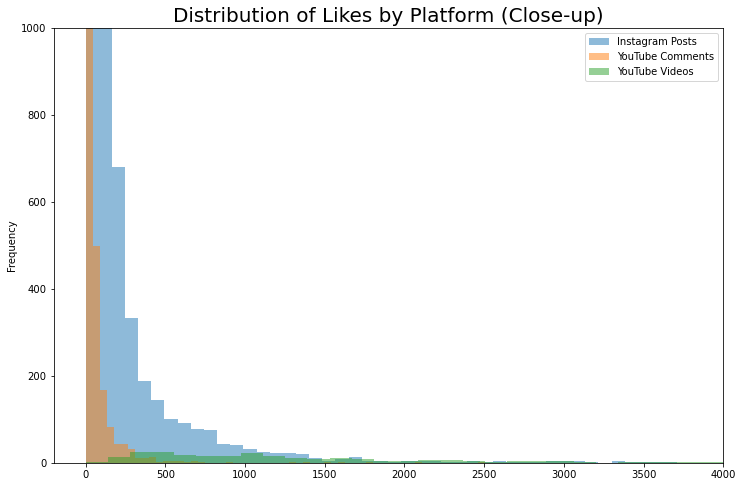

In [112]:
plt.figure(figsize=[12,8])
plt.title("Distribution of Likes by Platform (Close-up)", size=20)
df_merged_drop_targets.groupby("platform")["likes"].plot(kind="hist", alpha=0.5, bins=100, xlim=[-200,4000], ylim=[0,1000])
plt.legend()
plt.savefig("../assets/hist_likes_platforms.png", transparent=True, bbox_inches='tight')
plt.show()

We can observe the different distributions of likes from the histogram above. These different distributions is something we should consider as we go about determining popularity. The method to determine popularity is to find the top-performing post/video/comment in terms of likes. Therefore, we need to find the outliers within their respective distributions.

As we have tested in notebook 3.5 during model selections, there are three heuristics to finding outliers. They are namely finding data points with likes at/greater than:

- 1 standard deviation from mean,
- 3 standard deviations from mean,
- and 1.5 times inter-quartile range (IQR).

In the end, in the interest of preventing unbalanced classes, the preferred heuristic was the method that was most generous and that consistently yieled us the greatest number of outliers in each of the distributions - 1.5 times of the IQR. We shall apply this same method here to engineer our popularity target variable.

#### Instagram Posts Popularity

In [113]:
df_insta_drop_targets.head(3)

,post_id,post_slug,unix_time,date_time,post_caption,hashtags,topic_tags,is_video,is_ad,post_likes,...,post_caption_drop_hash,at_tags,useful_tags,tags,content,post_age,hash_count,content_len,platform,content_drop_target
0,1006641971264095607,34T4oZMgV3,1434221095,2015-06-13 18:44:55,Oh look! Natural heart shaped form of Ivan Hen...,"['#pinkdotsg', '#whereloveslivesg', '#rediscov...",['2 people.'],False,False,40,...,oh look natural heart shaped form ivan heng gl...,NaN,NaN,NaN,oh look natural heart shaped form ivan heng gl...,1958,18,326.0,Instagram Posts,oh look natural heart shaped form ivan heng gl...
1,1202880298563729182,BCxfUInNPce,1457614527,2016-03-10 12:55:27,.\n.\n.\n.\n.\n.\n#exploresingapore #instasg #...,"['#exploresingapore', '#instasg', '#gf_singapo...",['indoor.'],False,False,33,...,NaN,NaN,indoor,indoor,#exploresingapore #instasg #gfsingapore #gameo...,1687,21,274.0,Instagram Posts,#exploresingapore #instasg #gfsingapore #gameo...
2,677102977071319026,lljZH4sgfy,1394936986,2014-03-16 02:29:46,On the road to hell..... Reliving Haw Par Vill...,"['', '#singapore']",['Photo by Belinda Tan in 虎豹别墅.'],False,False,3,...,road hell reliving haw par villa 15 16 22 23 m...,NaN,NaN,NaN,road hell reliving haw par villa 15 16 22 23 m...,2412,1,95.0,Instagram Posts,road hell reliving haw par villa 15 16 22 23 m...


In [114]:
# find 1.5x IQR
q75, q25 = np.percentile(df_insta_drop_targets["post_likes"], [75, 25])
iqr = q75 - q25

# create popularity col
popular = df_insta_drop_targets["post_likes"] > iqr
df_insta_drop_targets["popular"] = popular.astype(int)
df_insta_drop_targets.head(3)

,post_id,post_slug,unix_time,date_time,post_caption,hashtags,topic_tags,is_video,is_ad,post_likes,...,at_tags,useful_tags,tags,content,post_age,hash_count,content_len,platform,content_drop_target,popular
0,1006641971264095607,34T4oZMgV3,1434221095,2015-06-13 18:44:55,Oh look! Natural heart shaped form of Ivan Hen...,"['#pinkdotsg', '#whereloveslivesg', '#rediscov...",['2 people.'],False,False,40,...,NaN,NaN,NaN,oh look natural heart shaped form ivan heng gl...,1958,18,326.0,Instagram Posts,oh look natural heart shaped form ivan heng gl...,0
1,1202880298563729182,BCxfUInNPce,1457614527,2016-03-10 12:55:27,.\n.\n.\n.\n.\n.\n#exploresingapore #instasg #...,"['#exploresingapore', '#instasg', '#gf_singapo...",['indoor.'],False,False,33,...,NaN,indoor,indoor,#exploresingapore #instasg #gfsingapore #gameo...,1687,21,274.0,Instagram Posts,#exploresingapore #instasg #gfsingapore #gameo...,0
2,677102977071319026,lljZH4sgfy,1394936986,2014-03-16 02:29:46,On the road to hell..... Reliving Haw Par Vill...,"['', '#singapore']",['Photo by Belinda Tan in 虎豹别墅.'],False,False,3,...,NaN,NaN,NaN,road hell reliving haw par villa 15 16 22 23 m...,2412,1,95.0,Instagram Posts,road hell reliving haw par villa 15 16 22 23 m...,0


In [115]:
df_insta_drop_targets["popular"].value_counts(normalize=True)

0    0.691591
1    0.308409
Name: popular, dtype: float64

Setting our measure of outliers at 1.5 times IQR, we have managed to label 30.8% of Instagram Posts as popular.

#### YouTube Videos Popularity

In [116]:
df_yt_sel.head(3)

,video_title,video_caption,date_time,video_slug,video_views,video_likes,video_dislikes,video_comments,video_title_clean,video_caption_clean,content,channel,video_age,content_len,platform
0,HALLOWEEN HORROR NIGHTS 8 AT UNIVERSAL STUDIOS! 👻,['UNIVERSAL HALLOWEEN HORROR NIGHTS 8! 👻\n\nHa...,2018-10-31,7xkdm3c4Ks8,8766,271,3,18,halloween horror nights 8 universal studios,'universal halloween horror nights 8 happy hal...,halloween horror nights 8 universal studios 'u...,GC,718,1277,YouTube Videos
1,Eating the BEST rated PRATA in SINGAPORE! 🇸🇬 *...,['Eating the BEST rated PRATA in SINGAPORE! 🇸🇬...,2019-11-17,b-ppBtSiG38,33483,649,19,159,eating best rated prata longest queue ever,'eating best rated prata eaten prata think che...,eating best rated prata longest queue ever 'ea...,GC,336,1375,YouTube Videos
2,McDoanlds Hokkaido Salmon Burger In Singapore!,['TRYING MCDONALDS HOKKAIDO SALMON BURGER IN S...,2018-05-13,IDXoNb548ec,13809,430,13,117,mcdoanlds hokkaido salmon burger,'trying mcdonalds hokkaido salmon burger try i...,mcdoanlds hokkaido salmon burger 'trying mcdon...,GC,889,908,YouTube Videos


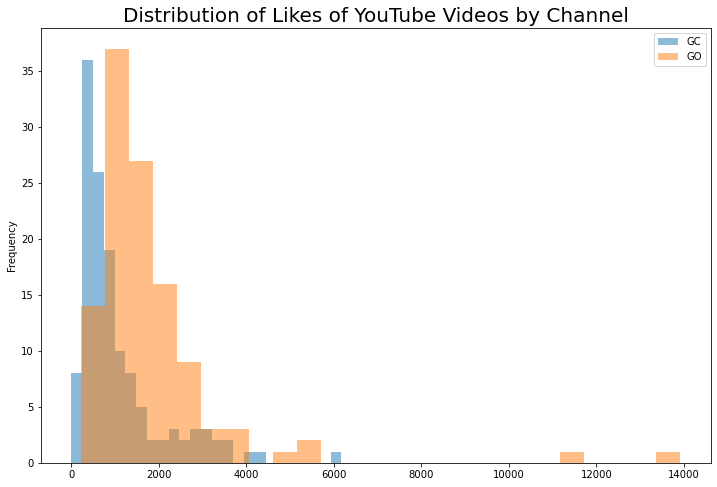

In [117]:
plt.figure(figsize=[12,8])
plt.title("Distribution of Likes of YouTube Videos by Channel", size=20)
df_yt_sel.groupby("channel")["video_likes"].plot(kind="hist", alpha=0.5, bins=25)
plt.savefig("../assets/hist_likes_ytvids.png", transparent=True, bbox_inches='tight')
plt.legend()
plt.show()

Even within YouTube, we can observe different distributions of likes across the different channels. To provide more accurate labels for our model, we shall further split the data set for both videos and comments into these platforms and evaluate the outliers accordingly within each channel.

In [118]:
# split df into each channel
df_yt_gc = df_yt_sel.groupby("channel").get_group("GC")
df_yt_go = df_yt_sel.groupby("channel").get_group("GO")

In [119]:
# find 1.5x IQR for GC's videos
q75, q25 = np.percentile(df_yt_gc["video_likes"], [75, 25])
iqr = q75 - q25

# create popularity col
popular = df_yt_gc["video_likes"] > iqr
df_yt_gc["popular"] = popular.astype(int)
df_yt_gc["popular"].value_counts(normalize=True)

<ipython-input-119-39e662e7dfe3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yt_gc["popular"] = popular.astype(int)


0    0.597015
1    0.402985
Name: popular, dtype: float64

In [120]:
# find 1.5x IQR for GO's videos
q75, q25 = np.percentile(df_yt_go["video_likes"], [75, 25])
iqr = q75 - q25

# create popularity col
popular = df_yt_go["video_likes"] > iqr
df_yt_go["popular"] = popular.astype(int)
df_yt_go["popular"].value_counts(normalize=True)

<ipython-input-120-9655eb7236db>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yt_go["popular"] = popular.astype(int)


1    0.736842
0    0.263158
Name: popular, dtype: float64

After finding the 1.5 times IQR threshold to determine outliers, we are able to label 40.3% of Georgia Caney's videos and 26.3% of Ghib Ojisan's videos as popular.

#### YouTube Comments Popularity

In [121]:
df_yt_comments_sel.head(3)

,response_to,user,timestamp,comment,likes,replies_attracted,comment_clean,channel,date_time,date_time_2,comment_age,content_len,platform
0,HALLOWEEN HORROR NIGHTS 8 AT UNIVERSAL STUDIOS! 👻,thattham,1 year ago,"I was a scare actor in killuminati, we hope u ...",4,CLAIM NOW!,scare actor killuminati hope u liked,GC,2018-10-31,2018-10-31,718.0,60,YouTube Comments
1,McDoanlds Hokkaido Salmon Burger In Singapore!,Whyywinter.,2 years ago,Hey friends! 👋🏻 What’s your thoughts on Mcdona...,35,View 10 replies,hey friends what’s thoughts mcdonalds hakkaido...,GC,2018-05-13,2018-05-13,889.0,150,YouTube Comments
2,McDoanlds Hokkaido Salmon Burger In Singapore!,CT,2 years ago,Is it even possible to dislike seaweed shaker ...,51,NaN,even possible dislike seaweed shaker fries tot...,GC,2018-05-13,2018-05-13,889.0,103,YouTube Comments


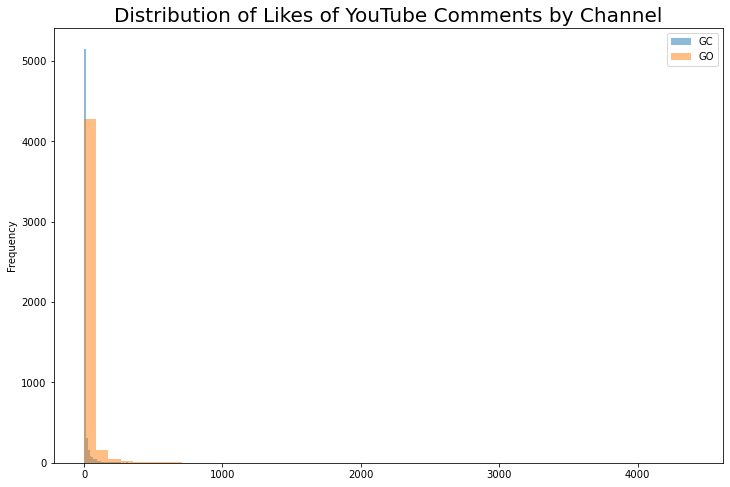

In [122]:
plt.figure(figsize=[12,8])
plt.title("Distribution of Likes of YouTube Comments by Channel", size=20)
df_yt_comments_sel.groupby("channel")["likes"].plot(kind="hist", alpha=0.5, bins=50)
plt.savefig("../assets/hist_likes_ytcomm.png", transparent=True, bbox_inches='tight')
plt.legend()
plt.show()

Likewise with YouTube comments, the distribution differs between the two channels. It seems that comments on GC's channel receive on average less likes while GO's channel received more likes. This could suggest greater interaction and support on GO's channel relative to GC's. Interestingly, the highest number of likes a comment received was observed at GC's channel, demonstrating a greater and more extreme likes gap there than at GO's. This could be further indicative of the nature of the general comments on either channel.

In [123]:
# split df into each channel
df_comm_gc = df_yt_comments_sel.groupby("channel").get_group("GC")
df_comm_go = df_yt_comments_sel.groupby("channel").get_group("GO")

In [124]:
# find 1.5x IQR for GC's videos
q75, q25 = np.percentile(df_comm_gc["likes"], [75, 25])
iqr = q75 - q25

# create popularity col
popular = df_comm_gc["likes"] > iqr
df_comm_gc["popular"] = popular.astype(int)
df_comm_gc["popular"].value_counts(normalize=True)

<ipython-input-124-70b3a7cd4f23>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comm_gc["popular"] = popular.astype(int)


0    0.759222
1    0.240778
Name: popular, dtype: float64

In [125]:
# find 1.5x IQR for GO's videos
q75, q25 = np.percentile(df_comm_go["likes"], [75, 25])
iqr = q75 - q25

# create popularity col
popular = df_comm_go["likes"] > iqr
df_comm_go["popular"] = popular.astype(int)
df_comm_go["popular"].value_counts(normalize=True)

<ipython-input-125-40e05ea8437a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comm_go["popular"] = popular.astype(int)


0    0.735346
1    0.264654
Name: popular, dtype: float64

After finding the 1.5 times IQR threshold to determine outliers, we are able to label 24.1% of Georgia Caney's comments and 26.5% of Ghib Ojisan's comments as popular.

#### Merge DataFrame

In [126]:
# compile content
content = []
content.extend(df_insta_drop_targets["content_drop_target"])
content.extend(df_yt_gc["content"])
content.extend(df_yt_go["content"])
content.extend(df_comm_gc["comment_clean"])
content.extend(df_comm_go["comment_clean"])

# compile likes
likes = []
likes.extend(df_insta_drop_targets["post_likes"])
likes.extend(df_yt_gc["video_likes"])
likes.extend(df_yt_go["video_likes"])
likes.extend(df_comm_gc["likes"])
likes.extend(df_comm_go["likes"])

# compile popularity
popular = []
popular.extend(df_insta_drop_targets["popular"])
popular.extend(df_yt_gc["popular"])
popular.extend(df_yt_go["popular"])
popular.extend(df_comm_gc["popular"])
popular.extend(df_comm_go["popular"])

# compile platform
platform = []
platform.extend(df_insta_drop_targets["platform"])
platform.extend(df_yt_gc["platform"])
platform.extend(df_yt_go["platform"])
platform.extend(df_comm_gc["platform"])
platform.extend(df_comm_go["platform"])

# merge extracted data
df_merged_pop = pd.DataFrame({"content": content, "likes": likes, "popular": popular, "platform": platform})
df_merged_pop.head(3)

,content,likes,popular,platform
0,oh look natural heart shaped form ivan heng gl...,40,0,Instagram Posts
1,#exploresingapore #instasg #gfsingapore #gameo...,33,0,Instagram Posts
2,road hell reliving haw par villa 15 16 22 23 m...,3,0,Instagram Posts


In [127]:
df_merged_pop["popular"].value_counts(normalize=True)

0    0.713411
1    0.286589
Name: popular, dtype: float64

After merging DataFrame, we end up with a `popular` target variable of 28.7% popular and 71.3% not popular. While this is not the most imbalanced of classes, we should consider if the performance of the model can be improved with sampling/bootstrapping techinques.

### Features Engineering

As we are building a hybrid model to improve our model's predictive capability, we should include as many possibly relevant non-NLP features as possible. These should be meta-features that can offer further insights into understanding the domestic tourism landscape, allowing us to qualify our findings from our NLP model.

#### Overview of Current Features

In [128]:
df_insta_drop_targets.columns

Index(['post_id', 'post_slug', 'unix_time', 'date_time', 'post_caption',
       'hashtags', 'topic_tags', 'is_video', 'is_ad', 'post_likes', 'geo_tag',
       'geo_slug', 'owner_id', 'owner_verified', 'owner_privacy',
       'owner_unpublished', 'owner_total_posts', 'owner_total_followers',
       'post_caption_clean', 'post_caption_drop_target',
       'post_caption_drop_hash', 'at_tags', 'useful_tags', 'tags', 'content',
       'post_age', 'hash_count', 'content_len', 'platform',
       'content_drop_target', 'popular'],
      dtype='object')

In [129]:
df_yt_gc.columns

Index(['video_title', 'video_caption', 'date_time', 'video_slug',
       'video_views', 'video_likes', 'video_dislikes', 'video_comments',
       'video_title_clean', 'video_caption_clean', 'content', 'channel',
       'video_age', 'content_len', 'platform', 'popular'],
      dtype='object')

In [130]:
df_yt_go.columns

Index(['video_title', 'video_caption', 'date_time', 'video_slug',
       'video_views', 'video_likes', 'video_dislikes', 'video_comments',
       'video_title_clean', 'video_caption_clean', 'content', 'channel',
       'video_age', 'content_len', 'platform', 'popular'],
      dtype='object')

In [131]:
df_comm_gc.columns

Index(['response_to', 'user', 'timestamp', 'comment', 'likes',
       'replies_attracted', 'comment_clean', 'channel', 'date_time',
       'date_time_2', 'comment_age', 'content_len', 'platform', 'popular'],
      dtype='object')

In [132]:
df_comm_go.columns

Index(['response_to', 'user', 'timestamp', 'comment', 'likes',
       'replies_attracted', 'comment_clean', 'channel', 'date_time',
       'date_time_2', 'comment_age', 'content_len', 'platform', 'popular'],
      dtype='object')

As part of the EDA process, we had previously engineered some features data set. We have age of the post/video/comment at time of scrape, total combined length of text, and `hash_count` for Instagram that counts the number of hashtags used. As we left out counting hashtags for the YouTube data, let's count hashtags (if any) for our YouTube data.

#### Count Hashtags

In [133]:
def count_hash(df, target):
    return [len(re.findall(r"#", str(h))) for h in df[target]]

In [134]:
# count hashtags for yt data
df_yt_gc.loc[:, "hash_count"] = count_hash(df_yt_gc, "video_caption")
df_yt_go.loc[:, "hash_count"] = count_hash(df_yt_go, "video_caption")
df_comm_gc.loc[:, "hash_count"] = count_hash(df_comm_gc, "comment")
df_comm_go.loc[:, "hash_count"] = count_hash(df_comm_go, "comment")

C:\Users\yewto\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\yewto\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [135]:
df_comm_go.columns # verify that col was added

Index(['response_to', 'user', 'timestamp', 'comment', 'likes',
       'replies_attracted', 'comment_clean', 'channel', 'date_time',
       'date_time_2', 'comment_age', 'content_len', 'platform', 'popular',
       'hash_count'],
      dtype='object')

#### DateTime Information

Since we have DateTime data for each data point, let us extract the year, month, day, and time of day as new features. We should bear in mind that the DateTime data for the YouTube comments are assumed to be the same as the video it is responding to owing to the vague timestamps scraped from YouTube for the comments. From our EDA, it appears that a vast majority of the comments are made within the week of the video's posting, therefore it is a reasonable imputation to deduce. However, this means that the accuracy of our imputation deproves as the time feature we extract decrease in scale. That is to say, imputing using the DateTime from the video that each comment is responding to is going to be fairly accurate for the year or month, but less so for the day and time of day.

In [136]:
# create datetime features for year, month, day, and time of day
def extract_datetime(df, datetime):
    
    # use dt.accessor to extract year, month, day
    df.loc[:, "year"] = df[datetime].dt.year
    df.loc[:, "month"] = df[datetime].dt.month_name()
    df.loc[:, "day"] = df[datetime].dt.day_name()
    
    # create masks for the times of day
    midn = (df[datetime].dt.hour < 6)
    morn = (df[datetime].dt.hour >= 6) & (df[datetime].dt.hour < 12)
    noon = (df[datetime].dt.hour >= 12) & (df[datetime].dt.hour < 18)
    night = (df[datetime].dt.hour >= 18)
    # create new col for time of day
    df.loc[midn, "time_of_day"] = "Midnight"
    df.loc[morn, "time_of_day"] = "Morning"
    df.loc[noon, "time_of_day"] = "Afternoon"
    df.loc[night, "time_of_day"] = "Night"

In [137]:
extract_datetime(df_insta_drop_targets, "date_time")
df_insta_drop_targets.head(3) # verify cols were added

,post_id,post_slug,unix_time,date_time,post_caption,hashtags,topic_tags,is_video,is_ad,post_likes,...,post_age,hash_count,content_len,platform,content_drop_target,popular,year,month,day,time_of_day
0,1006641971264095607,34T4oZMgV3,1434221095,2015-06-13 18:44:55,Oh look! Natural heart shaped form of Ivan Hen...,"['#pinkdotsg', '#whereloveslivesg', '#rediscov...",['2 people.'],False,False,40,...,1958,18,326.0,Instagram Posts,oh look natural heart shaped form ivan heng gl...,0,2015,June,Saturday,Night
1,1202880298563729182,BCxfUInNPce,1457614527,2016-03-10 12:55:27,.\n.\n.\n.\n.\n.\n#exploresingapore #instasg #...,"['#exploresingapore', '#instasg', '#gf_singapo...",['indoor.'],False,False,33,...,1687,21,274.0,Instagram Posts,#exploresingapore #instasg #gfsingapore #gameo...,0,2016,March,Thursday,Afternoon
2,677102977071319026,lljZH4sgfy,1394936986,2014-03-16 02:29:46,On the road to hell..... Reliving Haw Par Vill...,"['', '#singapore']",['Photo by Belinda Tan in 虎豹别墅.'],False,False,3,...,2412,1,95.0,Instagram Posts,road hell reliving haw par villa 15 16 22 23 m...,0,2014,March,Sunday,Midnight


In [138]:
extract_datetime(df_yt_gc, "date_time")
df_yt_gc.head(3) # verify cols were added

C:\Users\yewto\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\yewto\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,video_title,video_caption,date_time,video_slug,video_views,video_likes,video_dislikes,video_comments,video_title_clean,video_caption_clean,...,channel,video_age,content_len,platform,popular,hash_count,year,month,day,time_of_day
0,HALLOWEEN HORROR NIGHTS 8 AT UNIVERSAL STUDIOS! 👻,['UNIVERSAL HALLOWEEN HORROR NIGHTS 8! 👻\n\nHa...,2018-10-31,7xkdm3c4Ks8,8766,271,3,18,halloween horror nights 8 universal studios,'universal halloween horror nights 8 happy hal...,...,GC,718,1277,YouTube Videos,0,0,2018,October,Wednesday,Midnight
1,Eating the BEST rated PRATA in SINGAPORE! 🇸🇬 *...,['Eating the BEST rated PRATA in SINGAPORE! 🇸🇬...,2019-11-17,b-ppBtSiG38,33483,649,19,159,eating best rated prata longest queue ever,'eating best rated prata eaten prata think che...,...,GC,336,1375,YouTube Videos,0,0,2019,November,Sunday,Midnight
2,McDoanlds Hokkaido Salmon Burger In Singapore!,['TRYING MCDONALDS HOKKAIDO SALMON BURGER IN S...,2018-05-13,IDXoNb548ec,13809,430,13,117,mcdoanlds hokkaido salmon burger,'trying mcdonalds hokkaido salmon burger try i...,...,GC,889,908,YouTube Videos,0,0,2018,May,Sunday,Midnight


In [139]:
extract_datetime(df_yt_go, "date_time")
df_yt_go.head(3) # verify cols were added

C:\Users\yewto\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\yewto\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,video_title,video_caption,date_time,video_slug,video_views,video_likes,video_dislikes,video_comments,video_title_clean,video_caption_clean,...,channel,video_age,content_len,platform,popular,hash_count,year,month,day,time_of_day
134,Singapore Semi-Lockdown Diary Day 0 | Japanese...,"[""This thing called the 'circuit breaker' is h...",2020-04-07,632WZ2a-GCw,84167,1931,51,318,semilockdown diary day 0 japanese living,thing called 'circuit breaker' happening actua...,...,GO,194,936,YouTube Videos,1,4,2020,April,Tuesday,Midnight
135,How Much Will I Earn If I Played Hikoukigumo o...,"['😃Subscribe： ', 'http://urx3.nu/HTUJ', '\n\nI...",2019-08-05,PkVmO44f6p4,26635,550,11,92,much earn played hikoukigumo street wind rises,'subscribe ' ' ' played hikoukigumo ghibli fil...,...,GO,440,1711,YouTube Videos,0,2,2019,August,Monday,Midnight
136,Visiting The Last Surviving Village in Singapo...,"[""Enable CC for English subtitles!\nSo today I...",2019-12-20,YXb5tJdIwZs,59869,1501,23,249,visiting last surviving village kampong lorong...,enable cc english subtitles today visited kamp...,...,GO,303,2891,YouTube Videos,1,1,2019,December,Friday,Midnight


In [140]:
extract_datetime(df_comm_gc, "date_time")
df_comm_gc.head(3) # verify cols were added

C:\Users\yewto\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\yewto\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,response_to,user,timestamp,comment,likes,replies_attracted,comment_clean,channel,date_time,date_time_2,comment_age,content_len,platform,popular,hash_count,year,month,day,time_of_day
0,HALLOWEEN HORROR NIGHTS 8 AT UNIVERSAL STUDIOS! 👻,thattham,1 year ago,"I was a scare actor in killuminati, we hope u ...",4,CLAIM NOW!,scare actor killuminati hope u liked,GC,2018-10-31,2018-10-31,718.0,60,YouTube Comments,0,0,2018.0,October,Wednesday,Midnight
1,McDoanlds Hokkaido Salmon Burger In Singapore!,Whyywinter.,2 years ago,Hey friends! 👋🏻 What’s your thoughts on Mcdona...,35,View 10 replies,hey friends what’s thoughts mcdonalds hakkaido...,GC,2018-05-13,2018-05-13,889.0,150,YouTube Comments,1,0,2018.0,May,Sunday,Midnight
2,McDoanlds Hokkaido Salmon Burger In Singapore!,CT,2 years ago,Is it even possible to dislike seaweed shaker ...,51,NaN,even possible dislike seaweed shaker fries tot...,GC,2018-05-13,2018-05-13,889.0,103,YouTube Comments,1,0,2018.0,May,Sunday,Midnight


In [141]:
extract_datetime(df_comm_go, "date_time")
df_comm_go.head(3) # verify cols were added

C:\Users\yewto\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\yewto\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,response_to,user,timestamp,comment,likes,replies_attracted,comment_clean,channel,date_time,date_time_2,comment_age,content_len,platform,popular,hash_count,year,month,day,time_of_day
6018,Singapore Semi-Lockdown Diary Day 0 | Japanese...,NaN,6 months ago,Even in Singapore now,1,View 4 replies,even,GO,2020-04-07,2020-04-07,194.0,21,YouTube Comments,0,0,2020,April,Tuesday,Midnight
6019,Singapore Semi-Lockdown Diary Day 0 | Japanese...,Steezy -,6 months ago,That jipun lang lai liao caught me off guard😂,219,NaN,jipun lang lai liao caught guard,GO,2020-04-07,2020-04-07,194.0,45,YouTube Comments,1,0,2020,April,Tuesday,Midnight
6020,Singapore Semi-Lockdown Diary Day 0 | Japanese...,Moonbeam,6 months ago,"Huat ah, jippun lang lai liao.",51,View 6 replies,huat ah jippun lang lai liao,GO,2020-04-07,2020-04-07,194.0,30,YouTube Comments,1,0,2020,April,Tuesday,Midnight


#### Geo-Tags

Looking through the features we have at our disposal, there are some geo-tag data available for Instagram posts. However, this information was not captured in our NLP column where we have aggregated all the text data. Let's add the geo-tag data into our content column.

In [142]:
df_insta_drop_targets["geo_tag"]

0                Pinkdot @ Hong Lim Park
1                         Yangtze Cinema
2                                   虎豹别墅
3                                    NaN
4        Esplanade – Theatres on the Bay
                      ...               
14158                                NaN
14159                          Singapore
14160                          Singapore
14161                                NaN
14162                     Lornie Flyover
Name: geo_tag, Length: 14163, dtype: object

In [143]:
# observing the geo_tag data above, we can see that the information is prone to splitting by vectorizers
# let's join them with underscores so we can ensure they do not split later
df_insta_drop_targets["geo_tag"].str.lower().str.split().str.join("_")

0                pinkdot_@_hong_lim_park
1                         yangtze_cinema
2                                   虎豹别墅
3                                    NaN
4        esplanade_–_theatres_on_the_bay
                      ...               
14158                                NaN
14159                          singapore
14160                          singapore
14161                                NaN
14162                     lornie_flyover
Name: geo_tag, Length: 14163, dtype: object

In [144]:
# add geo-tag info content with space in-between
df_insta_drop_targets["content_drop_target_add_geo"] = df_insta_drop_targets["content_drop_target"]\
                                                       + " "\
                                                       + df_insta_drop_targets["geo_tag"].fillna("").str.lower().str.split().str.join("_")
df_insta_drop_targets.head(3)

,post_id,post_slug,unix_time,date_time,post_caption,hashtags,topic_tags,is_video,is_ad,post_likes,...,hash_count,content_len,platform,content_drop_target,popular,year,month,day,time_of_day,content_drop_target_add_geo
0,1006641971264095607,34T4oZMgV3,1434221095,2015-06-13 18:44:55,Oh look! Natural heart shaped form of Ivan Hen...,"['#pinkdotsg', '#whereloveslivesg', '#rediscov...",['2 people.'],False,False,40,...,18,326.0,Instagram Posts,oh look natural heart shaped form ivan heng gl...,0,2015,June,Saturday,Night,oh look natural heart shaped form ivan heng gl...
1,1202880298563729182,BCxfUInNPce,1457614527,2016-03-10 12:55:27,.\n.\n.\n.\n.\n.\n#exploresingapore #instasg #...,"['#exploresingapore', '#instasg', '#gf_singapo...",['indoor.'],False,False,33,...,21,274.0,Instagram Posts,#exploresingapore #instasg #gfsingapore #gameo...,0,2016,March,Thursday,Afternoon,#exploresingapore #instasg #gfsingapore #gameo...
2,677102977071319026,lljZH4sgfy,1394936986,2014-03-16 02:29:46,On the road to hell..... Reliving Haw Par Vill...,"['', '#singapore']",['Photo by Belinda Tan in 虎豹别墅.'],False,False,3,...,1,95.0,Instagram Posts,road hell reliving haw par villa 15 16 22 23 m...,0,2014,March,Sunday,Midnight,road hell reliving haw par villa 15 16 22 23 m...


In [145]:
df_insta_drop_targets["content_drop_target_add_geo"][0] # verify string was added successfully

'oh look natural heart shaped form ivan heng glen goei #pinkdotsg always best outfits every year #whereloveslivesg #rediscoveringsingapore #exploringsingapore  #exploresg #interestingsingapore #funinsingapore #sg #singapore #sg50 #igsg #igsingapore #sgig #sgmemory #yoursingapore #pink #pinkdotsg #whereloveslivesg pinkdot_@_hong_lim_park'

### Re-merge DataFrames

It is very tedious to redo this compilation steps everytime we want to create a new DataFrame. Since most of the other features we want to include in our DataFrame have the same column name in their respective DataFrame, we can define a function to compile more succinctly. For now, let's create a new DataFrame first for our `content`, `likes`, and `age` columns since they have to be referenced from different column names.

In [146]:
# compile content
content = []
content.extend(df_insta_drop_targets["content_drop_target_add_geo"]) # change up content col used
content.extend(df_yt_gc["content"])
content.extend(df_yt_go["content"])
content.extend(df_comm_gc["comment_clean"])
content.extend(df_comm_go["comment_clean"])

# compile likes
likes = []
likes.extend(df_insta_drop_targets["post_likes"])
likes.extend(df_yt_gc["video_likes"])
likes.extend(df_yt_go["video_likes"])
likes.extend(df_comm_gc["likes"])
likes.extend(df_comm_go["likes"])

# compile age
age = []
age.extend(df_insta_drop_targets["post_age"])
age.extend(df_yt_gc["video_age"])
age.extend(df_yt_go["video_age"])
age.extend(df_comm_gc["comment_age"])
age.extend(df_comm_go["comment_age"])

# merge extracted data
df_merged_pop_extra = pd.DataFrame({"content": content, "likes": likes, "age": age})
df_merged_pop_extra.head(3)

,content,likes,age
0,oh look natural heart shaped form ivan heng gl...,40,1958.0
1,#exploresingapore #instasg #gfsingapore #gameo...,33,1687.0
2,road hell reliving haw par villa 15 16 22 23 m...,3,2412.0


In [147]:
# def function to compile a col for when dfs all share the same col name
def compile_col(list_df, target):
    compiled = [] # create empty list
    for df in list_df:
        compiled.extend(df[target]) # note that order of df is important
    return compiled

In [148]:
# keep to the same order for our list of dfs
list_df = [df_insta_drop_targets, df_yt_gc, df_yt_go, df_comm_gc, df_comm_go]

# compile features we want to include
popular = compile_col(list_df=list_df, target="popular")
platform = compile_col(list_df=list_df, target="platform")
date_time = compile_col(list_df=list_df, target="date_time")
year = compile_col(list_df=list_df, target="year")
month = compile_col(list_df=list_df, target="month")
day = compile_col(list_df=list_df, target="day")
time_of_day = compile_col(list_df=list_df, target="time_of_day")
hash_count = compile_col(list_df=list_df, target="hash_count")
content_len = compile_col(list_df=list_df, target="content_len")

df_extra = pd.DataFrame({"popular": popular,
                         "platform": platform,
                         "date_time": date_time,
                         "year": year, "month": month, "day": day, "time_of_day": time_of_day,
                         "hash_count": hash_count,
                         "content_len": content_len})
df_extra.head(3)

,popular,platform,date_time,year,month,day,time_of_day,hash_count,content_len
0,0,Instagram Posts,2015-06-13 18:44:55,2015.0,June,Saturday,Night,18,326.0
1,0,Instagram Posts,2016-03-10 12:55:27,2016.0,March,Thursday,Afternoon,21,274.0
2,0,Instagram Posts,2014-03-16 02:29:46,2014.0,March,Sunday,Midnight,1,95.0


In [149]:
df_merged_pop_extra = pd.concat([df_merged_pop_extra, df_extra], axis=1)
df_merged_pop_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25001 entries, 0 to 25000
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   content      24146 non-null  object        
 1   likes        25001 non-null  int64         
 2   age          24921 non-null  float64       
 3   popular      25001 non-null  int64         
 4   platform     25001 non-null  object        
 5   date_time    24921 non-null  datetime64[ns]
 6   year         24921 non-null  float64       
 7   month        24921 non-null  object        
 8   day          24921 non-null  object        
 9   time_of_day  24921 non-null  object        
 10  hash_count   25001 non-null  int64         
 11  content_len  25001 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 2.3+ MB


In [150]:
# noticed that we have missing values
# let's drop all the missing content
df_merged_pop_extra.dropna(subset=["content"], inplace=True)
df_merged_pop_extra.shape

(24146, 12)

In [151]:
df_merged_pop_extra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24146 entries, 0 to 25000
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   content      24146 non-null  object        
 1   likes        24146 non-null  int64         
 2   age          24067 non-null  float64       
 3   popular      24146 non-null  int64         
 4   platform     24146 non-null  object        
 5   date_time    24067 non-null  datetime64[ns]
 6   year         24067 non-null  float64       
 7   month        24067 non-null  object        
 8   day          24067 non-null  object        
 9   time_of_day  24067 non-null  object        
 10  hash_count   24146 non-null  int64         
 11  content_len  24146 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 2.4+ MB


In [152]:
# since there are not many missing, let's drop all the missing rows
df_merged_pop_extra.dropna(inplace=True)

# let's reset the index while we are at it
df_merged_pop_extra.reset_index(drop=True, inplace=True)
df_merged_pop_extra.shape # view final shape

(24067, 12)

In [153]:
df_merged_pop_extra.head(3)

,content,likes,age,popular,platform,date_time,year,month,day,time_of_day,hash_count,content_len
0,oh look natural heart shaped form ivan heng gl...,40,1958.0,0,Instagram Posts,2015-06-13 18:44:55,2015.0,June,Saturday,Night,18,326.0
1,#exploresingapore #instasg #gfsingapore #gameo...,33,1687.0,0,Instagram Posts,2016-03-10 12:55:27,2016.0,March,Thursday,Afternoon,21,274.0
2,road hell reliving haw par villa 15 16 22 23 m...,3,2412.0,0,Instagram Posts,2014-03-16 02:29:46,2014.0,March,Sunday,Midnight,1,95.0


In [154]:
# since there are no more missing values, we should be able to convert the numeric cols from float to int
df_merged_pop_extra.loc[:, "age"] = df_merged_pop_extra["age"].astype(int)
df_merged_pop_extra.loc[:, "year"] = df_merged_pop_extra["year"].astype(int)
df_merged_pop_extra.loc[:, "content_len"] = df_merged_pop_extra["content_len"].astype(int)
df_merged_pop_extra.head(3) # verify change was successful

,content,likes,age,popular,platform,date_time,year,month,day,time_of_day,hash_count,content_len
0,oh look natural heart shaped form ivan heng gl...,40,1958,0,Instagram Posts,2015-06-13 18:44:55,2015,June,Saturday,Night,18,326
1,#exploresingapore #instasg #gfsingapore #gameo...,33,1687,0,Instagram Posts,2016-03-10 12:55:27,2016,March,Thursday,Afternoon,21,274
2,road hell reliving haw par villa 15 16 22 23 m...,3,2412,0,Instagram Posts,2014-03-16 02:29:46,2014,March,Sunday,Midnight,1,95


In [155]:
# let's save out our final df
df_merged_pop_extra.to_csv("../datasets/df_merged_pop_extra.csv", index=False)

We have compiled our updated dataframe with newly-engineered features that we believe will be helpful towards aiding our model's prediction on popularity.

### Features Analysis

Since we have built a new dataset, let us redo some basic analysis on our features too.

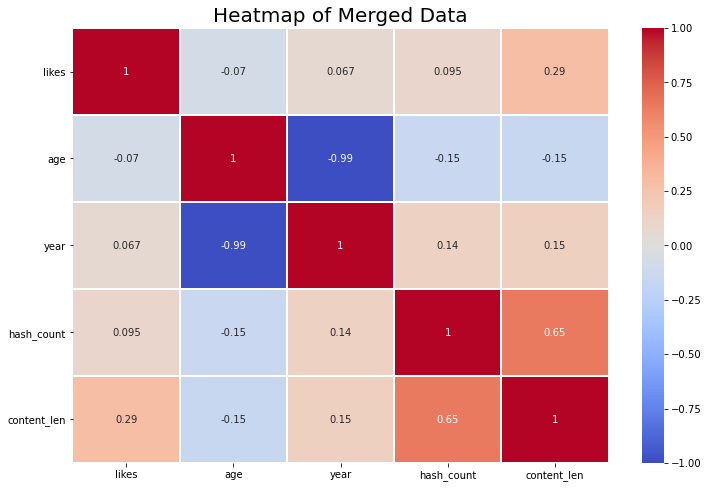

In [156]:
features = [feat for feat in df_merged_pop_extra.columns if feat != "popular"]

plt.figure(figsize=[12,8])
plt.title("Heatmap of Merged Data", size=20)
sns.heatmap(df_merged_pop_extra[features].corr(), annot=True, cmap="coolwarm",
            vmin=-1, vmax=1, linewidths=0.5)
plt.yticks(rotation=0)
plt.savefig("../assets/heatmap_pop_extra.png", transparent=True, bbox_inches='tight')
plt.show()

Length of our text content appears to be most correlated with the number of likes.

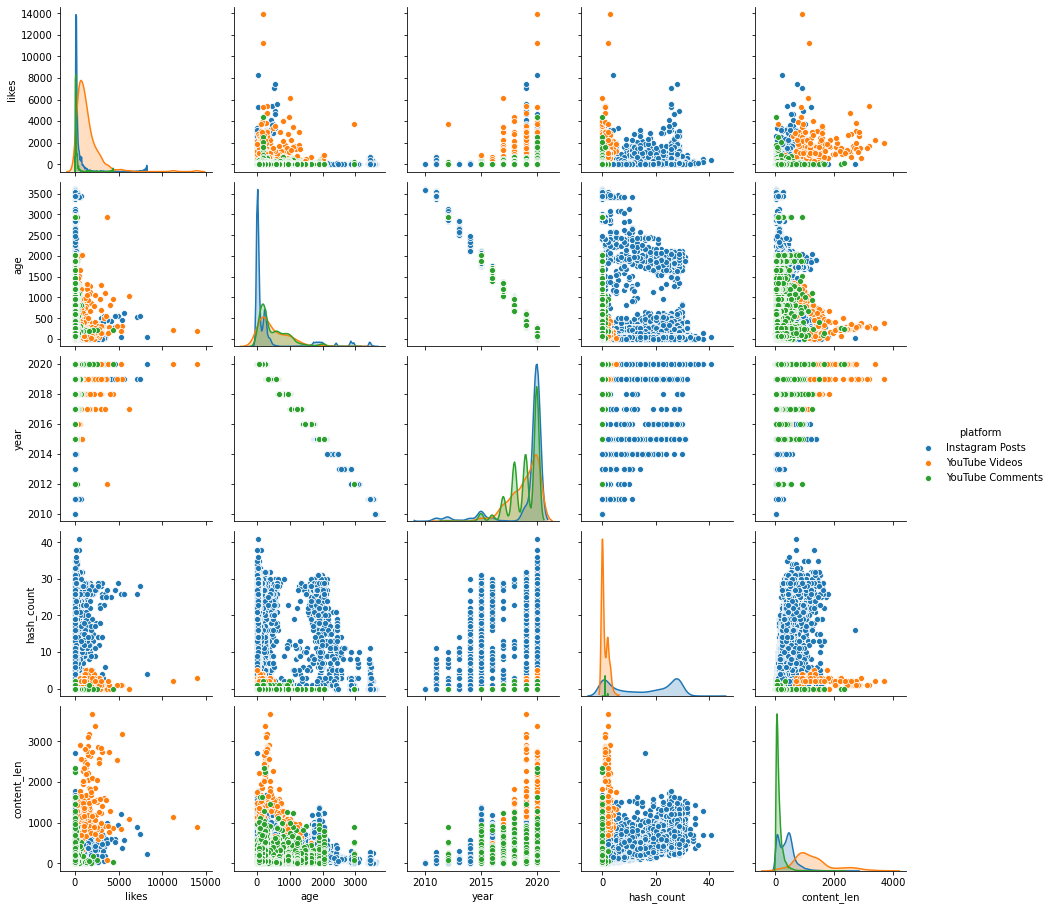

In [157]:
features = [feat for feat in df_merged_pop_extra.columns if feat != "popular"]
sns.pairplot(data=df_merged_pop_extra[features], hue="platform")
plt.savefig("../assets/pairplot_pop_extra.png", transparent=True, bbox_inches='tight')
plt.show()

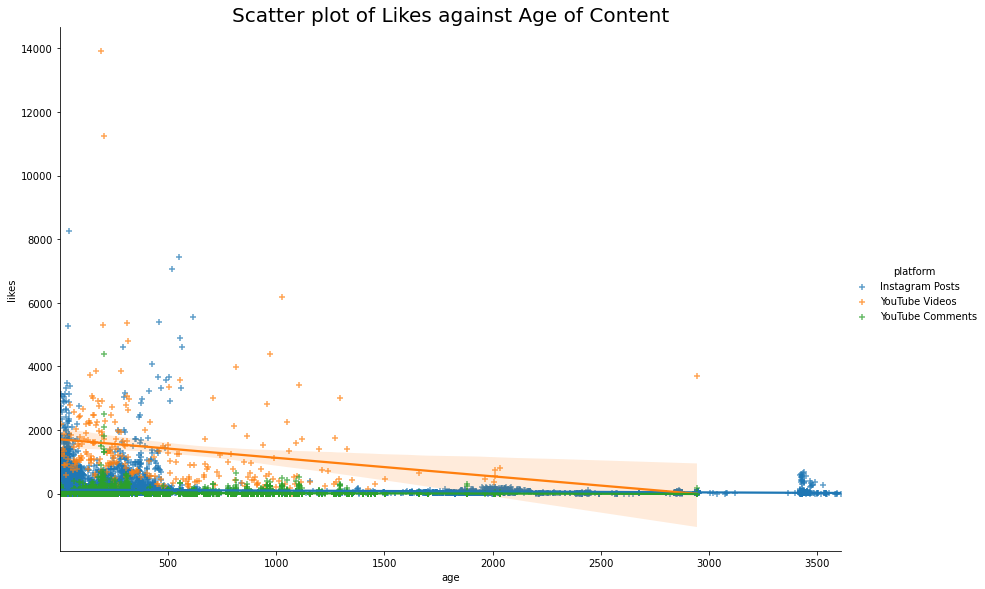

In [158]:
sns.lmplot(data=df_merged_pop_extra, x="age", y="likes", hue="platform",
           scatter_kws={"alpha": 0.7}, markers="+", height=8, aspect=1.5)
plt.title("Scatter plot of Likes against Age of Content", size=20)
plt.savefig("../assets/scatter_pop_extra_age.png", transparent=True, bbox_inches='tight')
plt.show()

YouTube videos has a sloping regression line, suggesting that YouTube videos tend to gain more likes the fresher the content is. For Instagram posts and YouTube comments however, the line appears flat, suggesting that there is lack of a trend between likes and age, only variance.

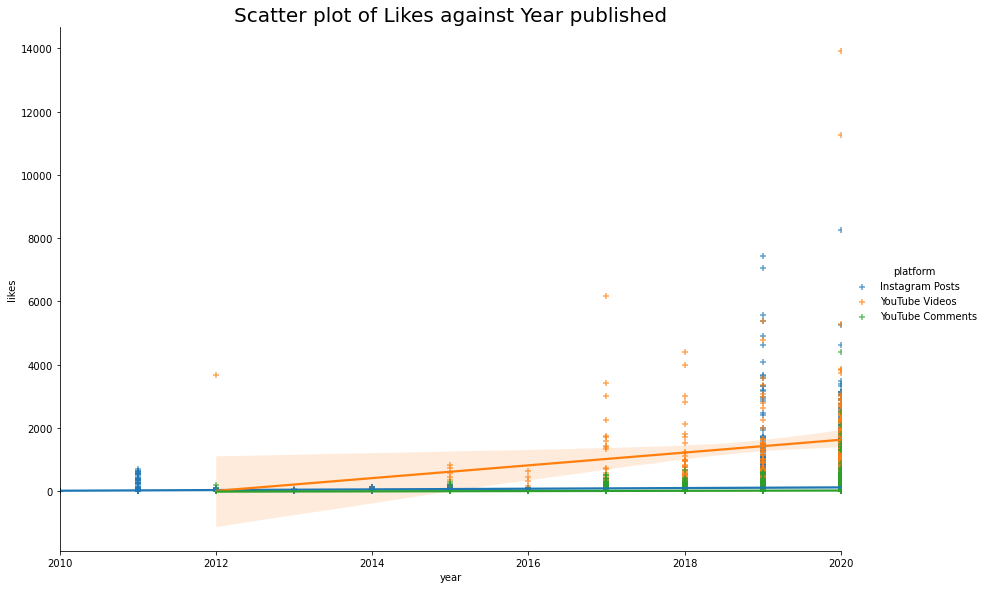

In [159]:
sns.lmplot(data=df_merged_pop_extra, x="year", y="likes", hue="platform",
           scatter_kws={"alpha": 0.7}, markers="+", height=8, aspect=1.5)
plt.title("Scatter plot of Likes against Year published", size=20)
plt.savefig("../assets/scatter_pop_extra_year.png", transparent=True, bbox_inches='tight')
plt.show()

Similarly, with year of publication, YouTube videos tend to do better over time. But the same flat line is observed for Instagram posts and YouTube comments.

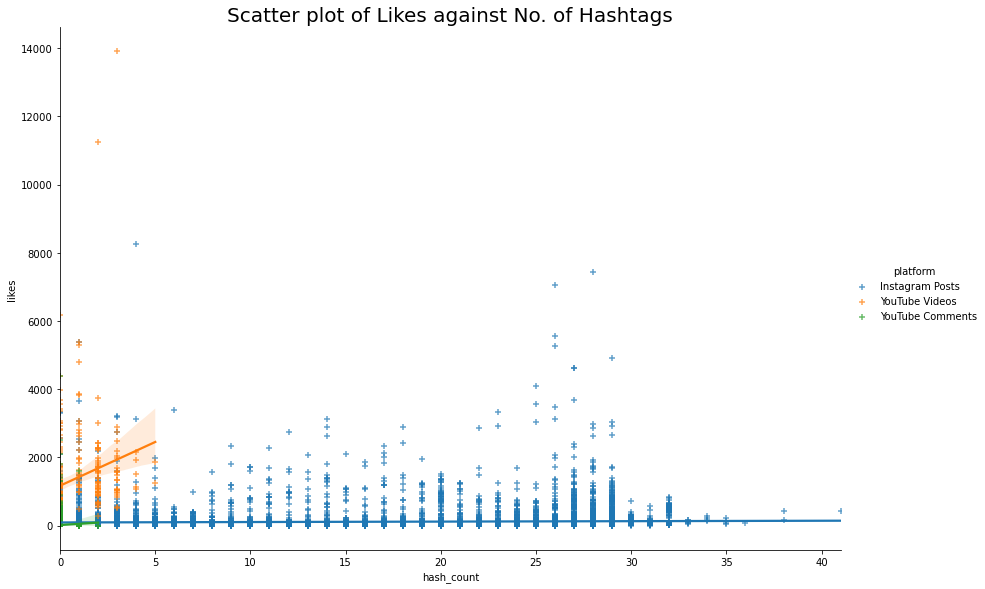

In [160]:
sns.lmplot(data=df_merged_pop_extra, x="hash_count", y="likes", hue="platform",
           scatter_kws={"alpha": 0.7}, markers="+", height=8, aspect=1.5)
plt.title("Scatter plot of Likes against No. of Hashtags", size=20)
plt.savefig("../assets/scatter_pop_extra_hash.png", transparent=True, bbox_inches='tight')
plt.show()

Hashtags matter most to YouTube Videos, where greater number of hashtags is correlated with greater number of likes. For Instagram posts and YouTube comments, the regression line is flat.

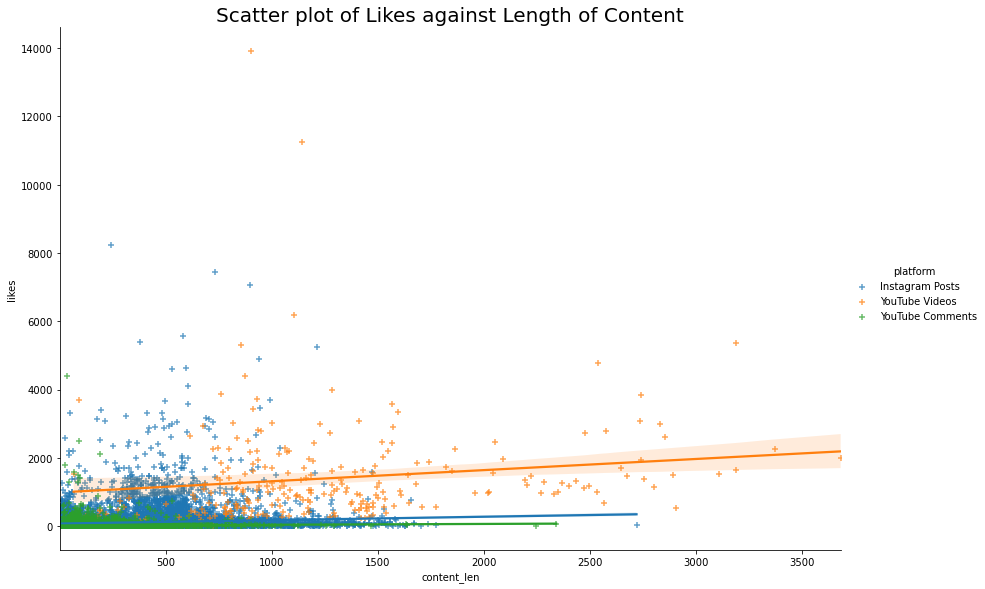

In [161]:
sns.lmplot(data=df_merged_pop_extra, x="content_len", y="likes", hue="platform",
           scatter_kws={"alpha": 0.7}, markers="+", height=8, aspect=1.5)
plt.title("Scatter plot of Likes against Length of Content", size=20)
plt.savefig("../assets/scatter_pop_extra_len.png", transparent=True, bbox_inches='tight')
plt.show()

Generally, there is a slight uptrend for YouTube videos and Instagram posts between the length of the text content and the number of likes gained.

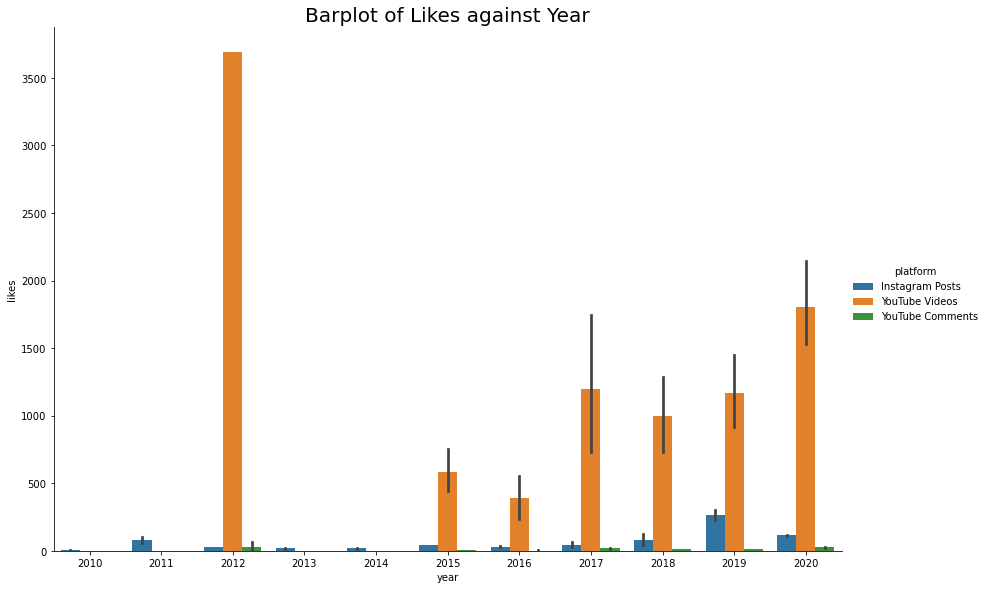

In [162]:
sns.catplot(data=df_merged_pop_extra,
            x='year',
            y='likes',
            hue='platform',
            height=8, aspect=1.5, kind="bar")
plt.gcf()
plt.title("Barplot of Likes against Year", size=20)
plt.savefig("../assets/bar_pop_extra_year.png", transparent=True, bbox_inches='tight')
plt.show()

Except for the anomaly in 2012 for a YouTube video, there is a general upwards trend for all (especially prominent for YouTube videos) over the years with respect to the number of likes.

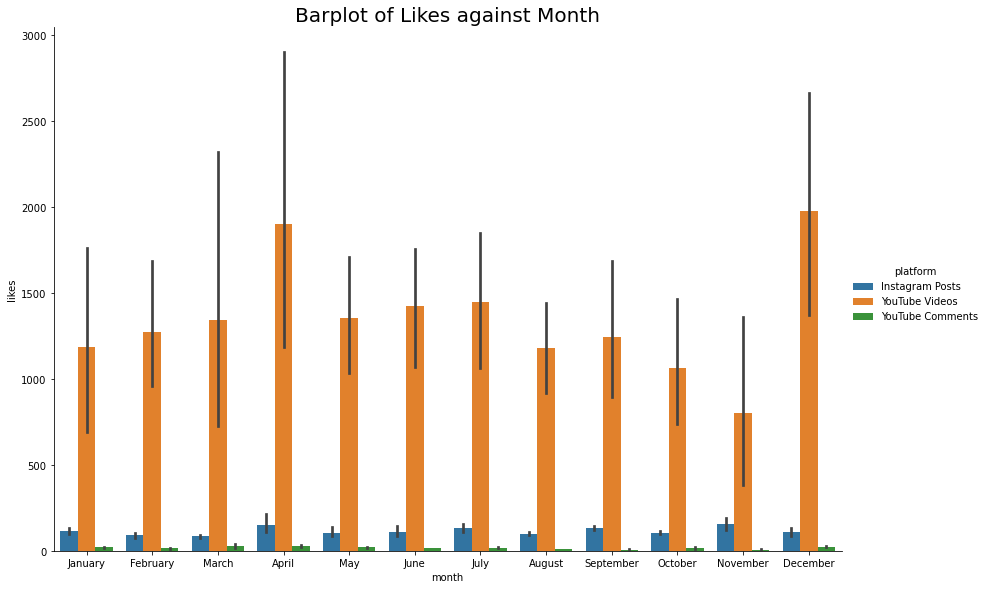

In [163]:
order = ["January", "February", "March", "April", "May", "June",
         "July", "August", "September", "October", "November", "December"]

sns.catplot(data=df_merged_pop_extra,
            x='month',
            y='likes',
            hue='platform',
            height=8, aspect=1.5, kind="bar", order=order)
plt.gcf()
plt.title("Barplot of Likes against Month", size=20)
plt.savefig("../assets/bar_pop_extra_month.png", transparent=True, bbox_inches='tight')
plt.show()

For YouTube videos, there appears to be some seasonality, with the peak coming in at April and then slowly tapering off for the rest of the year until a sudden spike in December again. YouTube comments likely follow this same pattern since the distribution of likes in the comments tracks the number of likes of the video the comments are responding to. No such seasonal pattern appears to exist for Instagram posts.

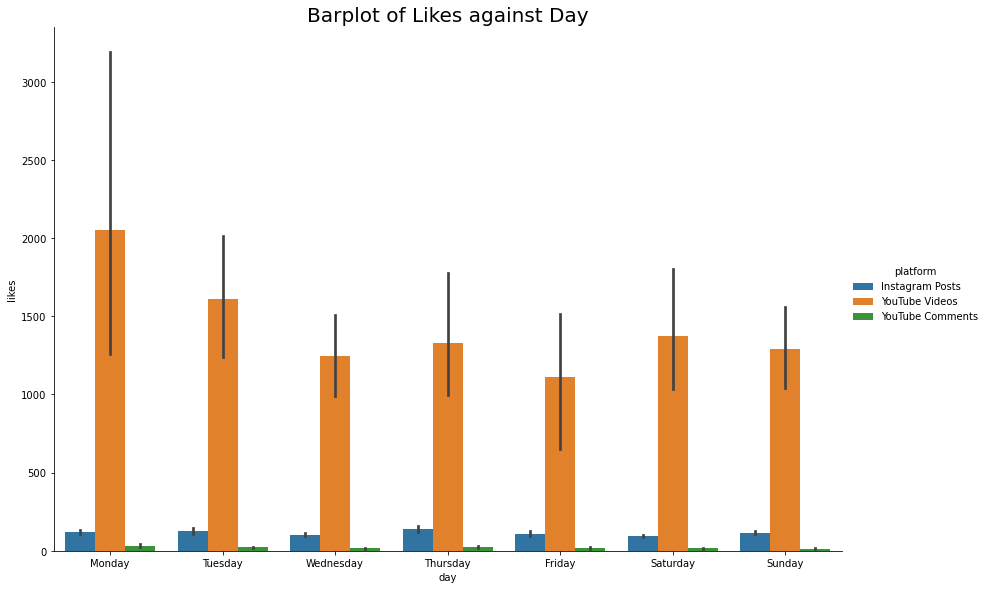

In [164]:
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

sns.catplot(data=df_merged_pop_extra,
            x='day',
            y='likes',
            hue='platform',
            height=8, aspect=1.5, kind="bar", order=order)
plt.gcf()
plt.title("Barplot of Likes against Day", size=20)
plt.savefig("../assets/bar_pop_extra_day.png", transparent=True, bbox_inches='tight')
plt.show()

For YouTube videos, there appears to be a weekly pattern peaking on Monday before slowly tapering off for the rest of the week. YouTube comments likely follow this same pattern since the distribution of likes in the comments tracks the number of likes of the video the comments are responding to. However, for Instagram, no such pattern appears to exist. 